# Education File

## Data Load

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
import requests # library to handle requests
import seaborn as sns
pd.set_option('display.max_columns', 500) #used for expand viewing options

#Load Math Data
xls = pd.ExcelFile('Data/2019MathAll.xlsx')
MState = pd.read_excel(xls, 'State')
MCounty = pd.read_excel(xls, 'County')
MDistrict = pd.read_excel(xls, 'District')
MSchool = pd.read_excel(xls, 'School')

#Load Reading Data

#xls = pd.ExcelFile('2019ReadingAll.xlsx')
#RState = pd.read_excel(xls, 'State')
#RCounty = pd.read_excel(xls, 'County')
#RDistrict = pd.read_excel(xls, 'District')
#RSchool = pd.read_excel(xls, 'School')


In [1]:
#RState

In [2]:
#Reading

xls = pd.ExcelFile('Data/2019ReadingAll.xlsx')
RState = pd.read_excel(xls, 'State')
RCounty = pd.read_excel(xls, 'County')
RDistrict = pd.read_excel(xls, 'District')
RSchool = pd.read_excel(xls, 'School')

In [3]:
#Science
xls = pd.ExcelFile('Data/2019ScienceAll.xlsx')
SState = pd.read_excel(xls, 'State')
SCounty = pd.read_excel(xls, 'County')
SDistrict = pd.read_excel(xls, 'District')
SSchool = pd.read_excel(xls, 'School')


In [4]:
#2019 Enrollment File; I had to remove the first column of the initial file

xls = pd.ExcelFile('Data/2019Enrollment.xls')
EState = pd.read_excel(xls, 'State')
ECounty = pd.read_excel(xls, 'County')
EDistrict = pd.read_excel(xls, 'District')
ESchool = pd.read_excel(xls, 'School')

## Data Prep

Note: The strands are different for each test, so take that into account

In [5]:
#function to define District Data

def schname(x): 
    if x in [272]:
        return 'Eden_District_All'
    elif x in [1]:
        return 'MPLS_District_All'
    elif x in [625]: 
        return 'SP_District_All'
    else: 
        return 'District_All'    

#Math Prep
MState['County Number']=0
MState['County Name']='State_All'
MState['School Name']='State_All'
MState['School Number']=0
MCounty['District Name']='County_All'
MCounty['School Name']='County_All'
MCounty['School Number']=0
MDistrict['School Name']=MDistrict['District Number'].apply(schname)  
MDistrict['School Number']=0

#Bring it to one table
MAll= pd.concat([MState,MCounty,MDistrict,MSchool])

#Compact Table
MAll.columns= ['Year', 'County_Num', 'County_Name', 'Dis_Num','Dis_Type', 'Dis_Name', 'School_Num', 'School_Name','ECSU_Num', 'Economic Development Region', 'School_Category','Test', 'Grade', 'Subject', 'Group_Category', 'Student_Group','Tot_Tested', 'Filter All', 'Count Valid Scores MCA', 'Filter MCA','Count Valid Scores MTAS', 'Filter MTAS', 'D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency','D_Percent', 'P_Percent', 'M_Percent','E_Percent', 'MCA_Average', 'MCA_SD','MCA_Average_NOPS', 'MCA_Average_ALGS','MCA_Average_GMS', 'MCA_Average_DAPS','MCA_Average_VSS', 'MTAS_Average','MTAS_SD', 'C_Absent', 'C_Invalid','Count Invalid - Student Behavior', 'Count Invalid - Device','Count Invalid - Other', 'Count Medical Exempt', 'C_NotAttempted','C_NotComplete', 'C_NotEnrolled', 'Count Refused','C_Parent', 'C_Student','Count Wrong Grade']
Features= ['Year', 'County_Num', 'County_Name', 'Dis_Num','Dis_Type', 'Dis_Name', 'School_Num', 'School_Name','School_Category','Test', 'Grade', 'Subject', 'Group_Category', 'Student_Group','Tot_Tested','D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency','D_Percent', 'P_Percent', 'M_Percent','E_Percent', 'MCA_Average', 'MCA_SD','MCA_Average_NOPS', 'MCA_Average_ALGS','MCA_Average_GMS', 'MCA_Average_DAPS','MCA_Average_VSS', 'MTAS_Average','C_Absent', 'C_NotAttempted','C_NotComplete', 'C_NotEnrolled', 'C_Parent', 'C_Student']
MAll=MAll[Features]

#Fix capitalization 
MAll['County_Name']=MAll['County_Name'].str.title()
MAll['Dis_Name']=MAll['Dis_Name'].str.title()
MAll['School_Name']=MAll['School_Name'].str.title()

#Reading Repeat
RState['County Number']=0
RState['County Name']='State_All'
RState['School Name']='State_All'
RState['School Number']=0
RCounty['District Name']='County_All'
RCounty['School Name']='County_All'
RCounty['School Number']=0
RDistrict['School Name']=RDistrict['District Number'].apply(schname) 
RDistrict['School Number']=0

RAll= pd.concat([RState,RCounty,RDistrict,RSchool])
RAll.columns= ['Year', 'County_Num', 'County_Name', 'Dis_Num','Dis_Type', 'Dis_Name', 'School_Num', 'School_Name','ECSU_Num', 'Economic Development Region', 'School_Category','Test', 'Grade', 'Subject', 'Group_Category', 'Student_Group','Tot_Tested', 'Filter All', 'Count Valid Scores MCA', 'Filter MCA','Count Valid Scores MTAS', 'Filter MTAS', 'D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency','D_Percent', 'P_Percent', 'M_Percent','E_Percent', 'MCA_Average', 'MCA_SD','MCA_Avg_LSS', 'MCA_Avg_INFS','MCA_Avg_VSS', 'MTAS_Average','MTAS_SD', 'C_Absent', 'C_Invalid','Count Invalid - Student Behavior', 'Count Invalid - Device','Count Invalid - Other', 'Count Medical Exempt', 'C_NotAttempted','C_NotComplete', 'C_NotEnrolled', 'Count Refused','C_Parent', 'C_Student','Count Wrong Grade']
Features= ['Year', 'County_Num', 'County_Name', 'Dis_Num','Dis_Type', 'Dis_Name', 'School_Num', 'School_Name','School_Category','Test', 'Grade', 'Subject', 'Group_Category', 'Student_Group','Tot_Tested','D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency','D_Percent', 'P_Percent', 'M_Percent','E_Percent', 'MCA_Average', 'MCA_SD','MCA_Avg_LSS', 'MCA_Avg_INFS','MCA_Avg_VSS', 'MTAS_Average','C_Absent', 'C_NotAttempted','C_NotComplete', 'C_NotEnrolled', 'C_Parent', 'C_Student']

RAll=RAll[Features]

RAll['County_Name']=RAll['County_Name'].str.title()
RAll['Dis_Name']=RAll['Dis_Name'].str.title()
RAll['School_Name']=RAll['School_Name'].str.title()


#Science Repeat
SState['County Number']=0
SState['County Name']='State_All'
SState['School Name']='State_All'
SState['School Number']=0
SCounty['District Name']='County_All'
SCounty['School Name']='County_All'
SCounty['School Number']=0
SDistrict['School Name']=SDistrict['District Number'].apply(schname) 
SDistrict['School Number']=0

SAll= pd.concat([SState,SCounty,SDistrict,SSchool])
SAll.columns= ['Year', 'County_Num', 'County_Name', 'Dis_Num','Dis_Type', 'Dis_Name', 'School_Num', 'School_Name','ECSU_Num', 'Economic Development Region', 'School_Category','Test', 'Grade', 'Subject', 'Group_Category', 'Student_Group','Tot_Tested', 'Filter All', 'Count Valid Scores MCA', 'Filter MCA','Count Valid Scores MTAS', 'Filter MTAS', 'D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency','D_Percent', 'P_Percent', 'M_Percent','E_Percent', 'MCA_Average', 'MCA_SD','MCA_Avg_NSE', 'MCA_Avg_PSCS','MCA_Avg_ESS','MCA_Avg_LIFS', 'MCA_Avg_POSS','MCA_Avg_POES','MCA_Avg_INTS', 'MCA_Avg_SFLS','MCA_Avg_IALS','MCA_Avg_EILS', 'MCA_Avg_HILS', 'MTAS_Average','MTAS_SD', 'C_Absent', 'C_Invalid','Count Invalid - Student Behavior', 'Count Invalid - Device','Count Invalid - Other', 'Count Medical Exempt', 'C_NotAttempted','C_NotComplete', 'C_NotEnrolled', 'Count Refused','C_Parent', 'C_Student','Count Wrong Grade']
Features= ['Year', 'County_Num', 'County_Name', 'Dis_Num','Dis_Type', 'Dis_Name', 'School_Num', 'School_Name','School_Category','Test', 'Grade', 'Subject', 'Group_Category', 'Student_Group','Tot_Tested','D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency','D_Percent', 'P_Percent', 'M_Percent','E_Percent', 'MCA_Average', 'MCA_SD','MCA_Avg_NSE', 'MCA_Avg_PSCS','MCA_Avg_ESS','MCA_Avg_LIFS', 'MCA_Avg_POSS','MCA_Avg_POES','MCA_Avg_INTS', 'MCA_Avg_SFLS','MCA_Avg_IALS','MCA_Avg_EILS', 'MCA_Avg_HILS', 'MTAS_Average','C_Absent', 'C_NotAttempted','C_NotComplete', 'C_NotEnrolled', 'C_Parent', 'C_Student']
SAll=SAll[Features]

SAll['County_Name']=SAll['County_Name'].str.title()
SAll['Dis_Name']=SAll['Dis_Name'].str.title()
SAll['School_Name']=SAll['School_Name'].str.title()

#Enrollment
EState['County Number']=0
EState['County Name']='State_All'
EState['School Name']='State_All'
EState['School Number']=0
ECounty['District Name']='County_All'
ECounty['School Name']='County_All'
ECounty['School Number']=0
EDistrict['School Name']=EDistrict['District Number'].apply(schname) 
EDistrict['School Number']=0

EAll_raw= pd.concat([EState,ECounty,EDistrict,ESchool])

Features= ['Data Year', 'County Number', 'County Name', 'District Number','District Type', 'District Name', 'School Number', 'School Name','ECSU Number',  'School Classification','Grade', 'Total Enrollment', 'Filter Groups', 'Total Female Count','Total Female Percent', 'Total Male Count', 'Total Male Percent','Total White Count','Total White Percent', 'White Female Count', 'White Male Count', 'Total Black or African American Percent','Total Asian Percent', 'Total Students of Color or American Indian Count','Total Students of Color or American Indian Percent','Total Students Eligible for Free or Reduced-Priced Meals Count','Total Students Eligible for Free or Reduced-Priced Meals Percent','Total Students Receiving Special Education Services Count','Total Students Receiving Special Education Services Percent','Total English Learner Identified Count','Total English Learner Identified Percent','Total Students Experiencing Homelessness Count','Total Students Experiencing Homelessness Percent']
EAll=EAll_raw[Features]
EAll.columns= ['Year', 'County_Num', 'County_Name', 'Dis_Num','Dis_Type', 'Dis_Name', 'School_Num', 'School_Name','ECSU_Num','School_Category', 'Grade','Tot_Enroll','Filter_Group','Female_Count','Female_Percent', 'Male_Count', 'Male_Percent','White_Count', 'White_Percent', 'WhiteFemale_Count','WhiteMale_Count','Black_Percent', 'Asian_Percent','POC_Count','POC_Percent','FRP_Count','FRP_Percent','SPED_Count','SPED_Percent','ELL_Count','ELL_Percent','Home_Count','Homeless_Percent']

EAll['County_Name']=EAll['County_Name'].str.title()
EAll['Dis_Name']=EAll['Dis_Name'].str.title()
EAll['School_Name']=EAll['School_Name'].str.title()


#Correction of columns to query
EAll=EAll.replace({'no data': 0}, regex=True)
EAll.FRP_Count=EAll.FRP_Count.astype('float') 
EAll['FRP_Percent1']= round(EAll.FRP_Count / EAll.Tot_Enroll, 4) *100



In [73]:
EAll.columns

Index(['Year', 'County_Num', 'County_Name', 'Dis_Num', 'Dis_Type', 'Dis_Name',
       'School_Num', 'School_Name', 'ECSU_Num', 'School_Category', 'Grade',
       'Tot_Enroll', 'Filter_Group', 'Female_Count', 'Female_Percent',
       'Male_Count', 'Male_Percent', 'White_Count', 'White_Percent',
       'WhiteFemale_Count', 'WhiteMale_Count', 'Black_Percent',
       'Asian_Percent', 'POC_Count', 'POC_Percent', 'FRP_Count', 'FRP_Percent',
       'SPED_Count', 'SPED_Percent', 'ELL_Count', 'ELL_Percent', 'Home_Count',
       'Homeless_Percent', 'FRP_Percent1'],
      dtype='object')

## Enrollment 

In [118]:
#Enrollment for all Saint Paul schools
Features=["County_Num", "Dis_Num","School_Num","School_Name", "Grade","School_Category","Tot_Enroll",'Male_Percent', 'White_Percent','Black_Percent','Asian_Percent','FRP_Percent','ELL_Percent','SPED_Percent','Homeless_Percent','Home_Count',"FRP_Percent1"]
SP= EAll[Features].query("County_Num==62 and Dis_Num==625 and Grade=='All Grades' and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")
MN= EAll[Features].query("County_Num==27 and Dis_Num==1 and Grade=='All Grades' and School_Name=='Mpls_District_All'")
MN2= EAll[Features].query("County_Num==27 and Dis_Num==1 and Grade=='All Grades' and School_Category in (10,20,32,33)")
State= EAll[Features].query("Grade=='All Grades' and School_Name=='State_All'")

EComp= pd.concat([SP,MN,State])

#Compact Columns
Features=["School_Num","School_Name","Tot_Enroll",'Male_Percent', 'White_Percent','Black_Percent','Asian_Percent','FRP_Percent','ELL_Percent','SPED_Percent','Homeless_Percent']
EC=EComp[Features]
EC.columns=["Num","School","Tot_Enroll",'Male%', 'White%','Black%','Asian%','FRPL%','ELL%','SPED%','Homeless%']

#Save
EC.to_csv(r'Data/SPEnrollment.csv',index=False)

#Homeless Csv for school address

EHomeless= pd.concat([SP,MN2])
EHomeless["School_Name"].to_csv(r'Data/TwinCitiesSchools.csv',index=False)

#GET THE GEOcoordinates
Add= pd.read_csv('Data/AddSchool.csv')
Features=["School_Num","School_Name","Tot_Enroll",'Home_Count','Homeless_Percent']
HL= EHomeless[Features]
HL.columns=["Num","School","Tot_Enroll",'Homeless_Count','Homeless%']
HL=HL.set_index('School').join(Add.set_index('Schools'))
HL=HL.dropna( axis=0)
HL=HL.reset_index()
HL.to_csv(r'Data/TCHomeless.csv',index=False)




In [108]:
EHomeless.query('School_Num==0')

,County_Num,Dis_Num,School_Num,School_Name,Grade,School_Category,Tot_Enroll,Male_Percent,White_Percent,Black_Percent,Asian_Percent,FRP_Percent,ELL_Percent,SPED_Percent,Homeless_Percent,Home_Count,FRP_Percent1
2781,62.0,625.0,0.0,Sp_District_All,All Grades,NaN,36888.0,51.78,20.82,26.6,31.17,65.71%,29.70%,15.70%,1.74%,643.0,65.71
30,27.0,1.0,0.0,Mpls_District_All,All Grades,NaN,35580.0,51.35,35.35,35.3,5.02,56.90%,20.52%,17.02%,1.50%,535.0,56.90
15,0.0,9999.0,0.0,State_All,All Grades,NaN,889304.0,51.51,65.70,11.2,6.86,36.38%,8.36%,16.18%,0.91%,8079.0,36.38


### Math Complete



In [210]:
#Stack the appropiate category selections; notice the grade specifications
SP=MAll.query("County_Num==62 and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")
MN=MAll.query("County_Num==27 and Dis_Num==1 and School_Name=='Mpls_District_All'")
State=MAll.query("County_Name=='State_All'")

M_ES= pd.concat([SP,MN,State])
M_ES['Pass_Count']= M_ES.M_Count + M_ES.E_Count

# I want to flatten this information
#Features= [ 'School_Name', 'School_Category', 'Grade', 'Group_Category', 'Student_Group', 'Tot_Tested', 'D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency', 'D_Percent','P_Percent', 'M_Percent', 'E_Percent', 'MCA_Average', 'MCA_SD','MCA_Average_NOPS', 'MCA_Average_ALGS', 'MCA_Average_GMS','MCA_Average_DAPS', 'MCA_Average_VSS']
#M_ESBase=M_ES[Features].query("Student_Group=='All students'")

Features1=['School_Name','School_Num','Student_Group','Grade','Tot_Tested','M_Count', 'E_Count','Proficiency','Pass_Count']
M_ESBase=M_ES[Features1].query("Student_Group=='All students'")
#M_ESBase['Pass_Count']= M_ESBase.M_Count + M_ESBase.E_Count

Features2=['School_Name','Student_Group','Grade','Tot_Tested','Proficiency','Pass_Count']
W=M_ES[Features2].query("Student_Group=='White students'")
W.columns= ['School_Name','Student_Group','Grade','W_Tested','White_Prof','WhitePass_Count']
W.drop(['Student_Group'], axis=1, inplace=True)

M_ESBase = pd.merge(M_ESBase, W,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
M_ESBase['POC_Prof'] = round((M_ESBase.Pass_Count -M_ESBase.WhitePass_Count) / (M_ESBase.Tot_Tested- M_ESBase.W_Tested), 4) 
Features=['School_Name','School_Num','Grade','Proficiency','White_Prof','POC_Prof']
M_ESBase=M_ESBase[Features]

#General Features Table
Features=['School_Name','Student_Group','Grade','Proficiency'] 

#Black Students
B= M_ES[Features].query("Student_Group=='Black or African American students'")
B.columns= ['School_Name','Student_Group','Grade','Black_Prof']
B.drop(['Student_Group'], axis=1, inplace=True)
M_ESBase = pd.merge(M_ESBase, B,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Male Students
M= M_ES[Features].query("Student_Group=='Male students'")
M.columns= ['School_Name','Student_Group','Grade','Male_Prof']
M.drop(['Student_Group'], axis=1, inplace=True)
M_ESBase = pd.merge(M_ESBase, M,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Female Students
F= M_ES[Features].query("Student_Group=='Female students'")
F.columns= ['School_Name','Student_Group','Grade','Female_Prof']
F.drop(['Student_Group'], axis=1, inplace=True)
M_ESBase = pd.merge(M_ESBase, F,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
R= M_ES[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
R.columns= ['School_Name','Student_Group','Grade','FRPL_Prof']
R.drop(['Student_Group'], axis=1, inplace=True)
M_ESBase = pd.merge(M_ESBase, R,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Non- FRPL Students
N= M_ES[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
N.columns= ['School_Name','Student_Group','Grade','NonFRPL_Prof']
N.drop(['Student_Group'], axis=1, inplace=True)
M_ESBase = pd.merge(M_ESBase, N,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

M_ESBase.columns=['School', 'Num', 'Grade', 'Prof', 'White_Prof','POC_Prof', 'Black_Prof', 'Male_Prof', 'Female_Prof', 'FRPL_Prof','NonFRPL_Prof']
M_ESBase

M_ESBase.to_csv(r'Data/SPMath.csv',index=False)

### Reading

In [208]:
#Stack the appropiate category selections; notice the grade specifications
SP=RAll.query("County_Num==62 and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")
MN=RAll.query("County_Num==27 and Dis_Num==1 and School_Name=='Mpls_District_All'")
State=RAll.query("County_Name=='State_All'")

R_ES= pd.concat([SP,MN,State])
R_ES['Pass_Count']= R_ES.M_Count + R_ES.E_Count

# I want to flatten this information
#Features= [ 'School_Name', 'School_Category', 'Grade', 'Group_Category', 'Student_Group', 'Tot_Tested', 'D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency', 'D_Percent','P_Percent', 'M_Percent', 'E_Percent', 'MCA_Average', 'MCA_SD','MCA_Average_NOPS', 'MCA_Average_ALGS', 'MCA_Average_GMS','MCA_Average_DAPS', 'MCA_Average_VSS']
#R_ESBase=R_ES[Features].query("Student_Group=='All students'")

Features1=['School_Name','School_Num','Student_Group','Grade','Tot_Tested','M_Count', 'E_Count','Proficiency','Pass_Count']
R_ESBase=R_ES[Features1].query("Student_Group=='All students'")
#R_ESBase['Pass_Count']= R_ESBase.M_Count + R_ESBase.E_Count

Features2=['School_Name','Student_Group','Grade','Tot_Tested','Proficiency','Pass_Count']
W=R_ES[Features2].query("Student_Group=='White students'")
W.columns= ['School_Name','Student_Group','Grade','W_Tested','White_Prof','WhitePass_Count']
W.drop(['Student_Group'], axis=1, inplace=True)

R_ESBase = pd.merge(R_ESBase, W,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
R_ESBase['POC_Prof'] = round((R_ESBase.Pass_Count -R_ESBase.WhitePass_Count) / (R_ESBase.Tot_Tested- R_ESBase.W_Tested), 4) 
Features=['School_Name','School_Num','Grade','Proficiency','White_Prof','POC_Prof']
R_ESBase=R_ESBase[Features]

#General Features Table
Features=['School_Name','Student_Group','Grade','Proficiency'] 

#Black Students
B= R_ES[Features].query("Student_Group=='Black or African American students'")
B.columns= ['School_Name','Student_Group','Grade','Black_Prof']
B.drop(['Student_Group'], axis=1, inplace=True)
R_ESBase = pd.merge(R_ESBase, B,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Male Students
M= R_ES[Features].query("Student_Group=='Male students'")
M.columns= ['School_Name','Student_Group','Grade','Male_Prof']
M.drop(['Student_Group'], axis=1, inplace=True)
R_ESBase = pd.merge(R_ESBase, M,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Female Students
F= R_ES[Features].query("Student_Group=='Female students'")
F.columns= ['School_Name','Student_Group','Grade','Female_Prof']
F.drop(['Student_Group'], axis=1, inplace=True)
R_ESBase = pd.merge(R_ESBase, F,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
R= R_ES[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
R.columns= ['School_Name','Student_Group','Grade','FRPL_Prof']
R.drop(['Student_Group'], axis=1, inplace=True)
R_ESBase = pd.merge(R_ESBase, R,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Non- FRPL Students
N= R_ES[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
N.columns= ['School_Name','Student_Group','Grade','NonFRPL_Prof']
N.drop(['Student_Group'], axis=1, inplace=True)
R_ESBase = pd.merge(R_ESBase, N,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

R_ESBase.columns=['School', 'Num', 'Grade', 'Prof', 'White_Prof','POC_Prof', 'Black_Prof', 'Male_Prof', 'Female_Prof', 'FRPL_Prof','NonFRPL_Prof']
R_ESBase

R_ESBase.to_csv(r'Data/SPReading.csv',index=False)

,Year,County_Num,County_Name,Dis_Num,Dis_Type,Dis_Name,School_Num,School_Name,School_Category,Test,Grade,Subject,Group_Category,Student_Group,Tot_Tested,D_Count,P_Count,M_Count,E_Count,Proficiency,D_Percent,P_Percent,M_Percent,E_Percent,MCA_Average,MCA_SD,MCA_Avg_LSS,MCA_Avg_INFS,MCA_Avg_VSS,MTAS_Average,C_Absent,C_NotAttempted,C_NotComplete,C_NotEnrolled,C_Parent,C_Student
1269,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,3.0,Reading,All Categories,All students,2667.0,1318.0,409.0,711.0,229.0,0.3525,0.4942,0.1534,0.2666,0.0859,339.49,23.66,3.87,3.88,2323.77,190.79,2.0,2.0,15.0,3.0,28.0,0.0
1270,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,4.0,Reading,All Categories,All students,2732.0,1185.0,601.0,661.0,285.0,0.3463,0.4337,0.2200,0.2419,0.1043,442.65,17.09,4.01,3.98,2378.85,193.55,4.0,3.0,3.0,3.0,28.0,0.0
1271,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,5.0,Reading,All Categories,All students,2778.0,901.0,583.0,966.0,328.0,0.4658,0.3243,0.2099,0.3477,0.1181,546.95,16.37,4.05,4.13,2437.66,192.32,1.0,2.0,12.0,4.0,43.0,3.0
1272,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,6.0,Reading,All Categories,All students,2407.0,1042.0,439.0,615.0,311.0,0.3847,0.4329,0.1824,0.2555,0.1292,642.77,20.28,3.99,3.96,2464.08,188.74,0.0,0.0,12.0,0.0,23.0,0.0
1273,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,7.0,Reading,All Categories,All students,2371.0,973.0,517.0,618.0,263.0,0.3716,0.4104,0.2181,0.2606,0.1109,742.33,19.62,4.20,4.13,2515.31,196.30,0.0,1.0,23.0,0.0,31.0,2.0
1274,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,8.0,Reading,All Categories,All students,2256.0,968.0,404.0,608.0,276.0,0.3918,0.4291,0.1791,0.2695,0.1223,841.95,21.09,4.23,4.15,2538.02,187.13,0.0,1.0,21.0,0.0,49.0,4.0
1275,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,10.0,Reading,All Categories,All students,2246.0,710.0,506.0,672.0,358.0,0.4586,0.3161,0.2253,0.2992,0.1594,1046.92,16.19,4.23,4.25,NaN,194.35,0.0,4.0,46.0,0.0,100.0,4.0
3875,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,3.0,Reading,Race/Ethnicity,American Indian or Alaska Native students,19.0,14.0,1.0,4.0,0.0,0.2105,0.7368,0.0526,0.2105,0.0000,326.53,17.56,2.63,2.79,2252.58,NaN,0.0,0.0,1.0,0.0,3.0,0.0
3876,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,4.0,Reading,Race/Ethnicity,American Indian or Alaska Native students,22.0,16.0,3.0,2.0,1.0,0.1364,0.7273,0.1364,0.0909,0.0455,434.05,13.62,3.18,2.86,2308.50,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3877,18-19,62.0,Ramsey,625.0,1.0,St. Paul Public School District,0.0,Sp_District_All,NaN,All Academic Accountability Tests,5.0,Reading,Race/Ethnicity,American Indian or Alaska Native students,26.0,10.0,7.0,8.0,1.0,0.3462,0.3846,0.2692,0.3077,0.0385,542.92,14.40,3.46,3.46,2402.19,NaN,0.0,0.0,0.0,0.0,0.0,0.0


## Science

In [209]:
#Stack the appropiate category selections; notice the grade specifications
SP=SAll.query("County_Num==62 and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")
MN=SAll.query("County_Num==27 and Dis_Num==1 and School_Name=='Mpls_District_All'")
State=SAll.query("County_Name=='State_All'")

S_ES= pd.concat([SP,MN,State])
S_ES['Pass_Count']= S_ES.M_Count + S_ES.E_Count

# I want to flatten this information
#Features= [ 'School_Name', 'School_Category', 'Grade', 'Group_Category', 'Student_Group', 'Tot_Tested', 'D_Count','P_Count', 'M_Count', 'E_Count', 'Proficiency', 'D_Percent','P_Percent', 'M_Percent', 'E_Percent', 'MCA_Average', 'MCA_SD','MCA_Average_NOPS', 'MCA_Average_ALGS', 'MCA_Average_GMS','MCA_Average_DAPS', 'MCA_Average_VSS']
#S_ESBase=S_ES[Features].query("Student_Group=='All students'")

Features1=['School_Name','School_Num','Student_Group','Grade','Tot_Tested','M_Count', 'E_Count','Proficiency','Pass_Count']
S_ESBase=S_ES[Features1].query("Student_Group=='All students'")
#S_ESBase['Pass_Count']= S_ESBase.M_Count + S_ESBase.E_Count

Features2=['School_Name','Student_Group','Grade','Tot_Tested','Proficiency','Pass_Count']
W=S_ES[Features2].query("Student_Group=='White students'")
W.columns= ['School_Name','Student_Group','Grade','W_Tested','White_Prof','WhitePass_Count']
W.drop(['Student_Group'], axis=1, inplace=True)

S_ESBase = pd.merge(S_ESBase, W,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
S_ESBase['POC_Prof'] = round((S_ESBase.Pass_Count -S_ESBase.WhitePass_Count) / (S_ESBase.Tot_Tested- S_ESBase.W_Tested), 4) 
Features=['School_Name','School_Num','Grade','Proficiency','White_Prof','POC_Prof']
S_ESBase=S_ESBase[Features]

#General Features Table
Features=['School_Name','Student_Group','Grade','Proficiency'] 

#Black Students
B= S_ES[Features].query("Student_Group=='Black or African American students'")
B.columns= ['School_Name','Student_Group','Grade','Black_Prof']
B.drop(['Student_Group'], axis=1, inplace=True)
S_ESBase = pd.merge(S_ESBase, B,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Male Students
M= S_ES[Features].query("Student_Group=='Male students'")
M.columns= ['School_Name','Student_Group','Grade','Male_Prof']
M.drop(['Student_Group'], axis=1, inplace=True)
S_ESBase = pd.merge(S_ESBase, M,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Female Students
F= S_ES[Features].query("Student_Group=='Female students'")
F.columns= ['School_Name','Student_Group','Grade','Female_Prof']
F.drop(['Student_Group'], axis=1, inplace=True)
S_ESBase = pd.merge(S_ESBase, F,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
R= S_ES[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
R.columns= ['School_Name','Student_Group','Grade','FRPL_Prof']
R.drop(['Student_Group'], axis=1, inplace=True)
S_ESBase = pd.merge(S_ESBase, R,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#Non- FRPL Students
N= S_ES[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
N.columns= ['School_Name','Student_Group','Grade','NonFRPL_Prof']
N.drop(['Student_Group'], axis=1, inplace=True)
S_ESBase = pd.merge(S_ESBase, N,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

S_ESBase.columns=['School', 'Num', 'Grade', 'Prof', 'White_Prof','POC_Prof', 'Black_Prof', 'Male_Prof', 'Female_Prof', 'FRPL_Prof','NonFRPL_Prof']

S_ESBase.to_csv(r'Data/SPScience.csv',index=False)

## District vs State

### Math Data Prep 

In [112]:
Features= ['School','Grade','Prof']

#Base Level District
M_ESBaseProf= M_ESBase[Features].query('School=="Sp_District_All"')
M_ESBaseProf.drop(['School'], axis=1, inplace=True)
M_ESBaseProf.columns= ['Grade','Sp_District_Prof']

#Minneapolis
A= M_ESBase[Features].query('School=="Mpls_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Mpls_District_Prof']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State 
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Prof']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

##Male

Features= ['School','Grade','Male_Prof']

#District
A= M_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Male']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Male']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

##Female

Features= ['School','Grade','Female_Prof']

#District
A= M_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Female']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Female']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

##White

Features= ['School','Grade','White_Prof']

#District
A= M_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_White']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_White']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

##Black

Features= ['School','Grade','Black_Prof']

#District
A= M_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Black']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Black']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

##POC

Features= ['School','Grade','POC_Prof']

#District
A= M_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_POC']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_POC']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

##FRPL

Features= ['School','Grade','FRPL_Prof']

#District
A= M_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_FRPL']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_FRPL']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()


##NonFRPL

Features= ['School','Grade','NonFRPL_Prof']

#District
A= M_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_NonFRPL']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
M_ESBaseProf= M_ESBaseProf.reset_index()

#State
A= M_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_NonFRPL']
M_ESBaseProf=M_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
#M_ESBaseProf= M_ESBaseProf.reset_index()

M_ESBaseProf

M_ESBaseProf.to_csv(r'Data/DisMath.csv',index=False)

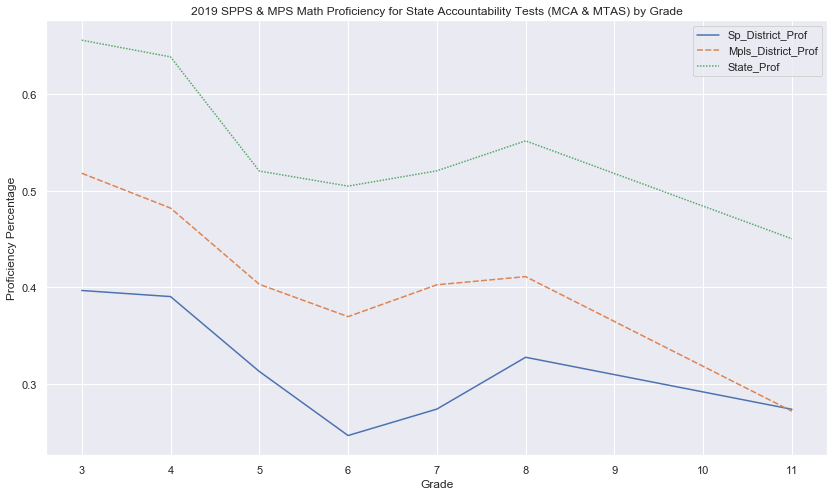

In [113]:
sns.set()
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS & MPS Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['Sp_District_Prof','Mpls_District_Prof', 'State_Prof']
bg=sns.lineplot(data=M_ESBaseProf[col])

# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Prof.png', dpi=400)

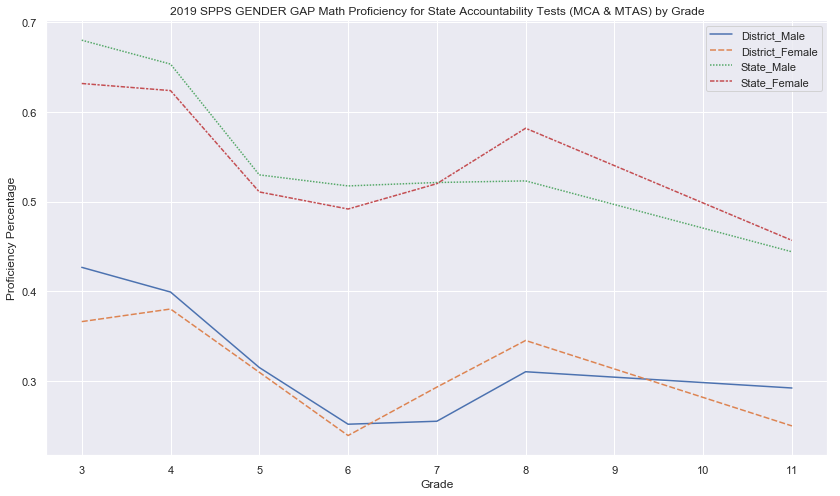

In [114]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS GENDER GAP Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_Male', 'District_Female','State_Male', 'State_Female']
bg=sns.lineplot(data=M_ESBaseProf[col])


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Gender.png', dpi=400)

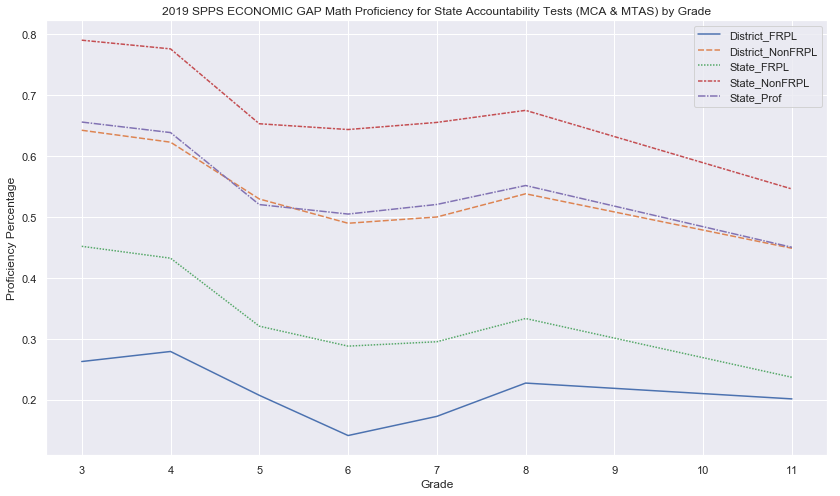

In [115]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS ECONOMIC GAP Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_FRPL', 'District_NonFRPL','State_FRPL', 'State_NonFRPL', 'State_Prof']
bg=sns.lineplot(data=M_ESBaseProf[col])


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Economic.png', dpi=400)

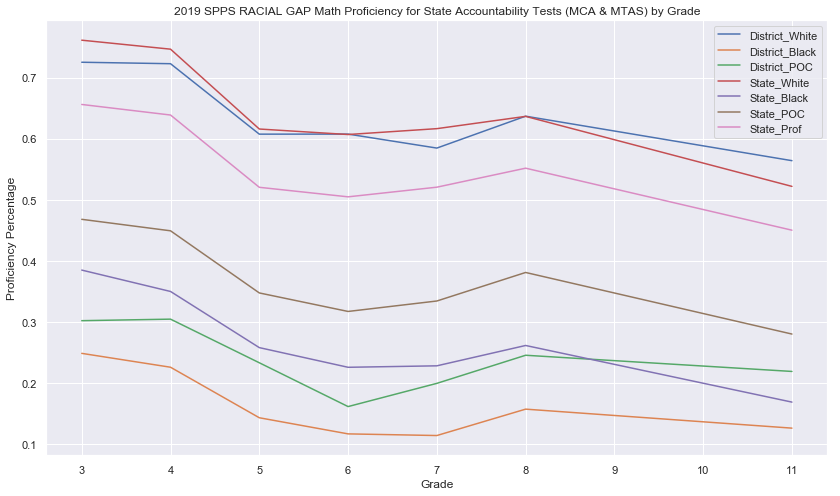

In [28]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS RACIAL GAP Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_White', 'District_Black','District_POC','State_White', 'State_Black','State_POC', 'State_Prof']
bg=sns.lineplot(data=M_ESBaseProf[col], dashes=False)


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Racial.png', dpi=400)

### Reading Prep

In [22]:
Features= ['School','Grade','Prof']

#Base Level District
R_ESBaseProf= R_ESBase[Features].query('School=="Sp_District_All"')
R_ESBaseProf.drop(['School'], axis=1, inplace=True)
R_ESBaseProf.columns= ['Grade','Sp_District_Prof']

#Minneapolis
A= R_ESBase[Features].query('School=="Mpls_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Mpls_District_Prof']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Prof']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

##Male

Features= ['School','Grade','Male_Prof']

#District
A= R_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Male']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Male']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

##Female

Features= ['School','Grade','Female_Prof']

#District
A= R_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Female']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Female']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

##White

Features= ['School','Grade','White_Prof']

#District
A= R_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_White']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_White']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

##Black

Features= ['School','Grade','Black_Prof']

#District
A= R_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Black']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Black']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

##POC

Features= ['School','Grade','POC_Prof']

#District
A= R_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_POC']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_POC']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

##FRPL

Features= ['School','Grade','FRPL_Prof']

#District
A= R_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_FRPL']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_FRPL']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()


##NonFRPL

Features= ['School','Grade','NonFRPL_Prof']

#District
A= R_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_NonFRPL']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
R_ESBaseProf= R_ESBaseProf.reset_index()

#State
A= R_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_NonFRPL']
R_ESBaseProf=R_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
#R_ESBaseProf= R_ESBaseProf.reset_index()

R_ESBaseProf

R_ESBaseProf.to_csv(r'Data/DisReading.csv',index=False)

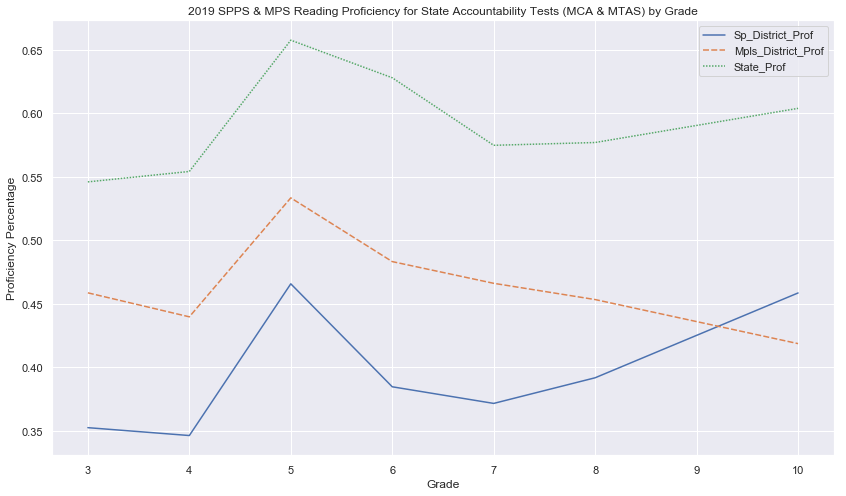

In [205]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS & MPS Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['Sp_District_Prof','Mpls_District_Prof', 'State_Prof']
bg=sns.lineplot(data=R_ESBaseProf[col])

# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Prof.png', dpi=400)

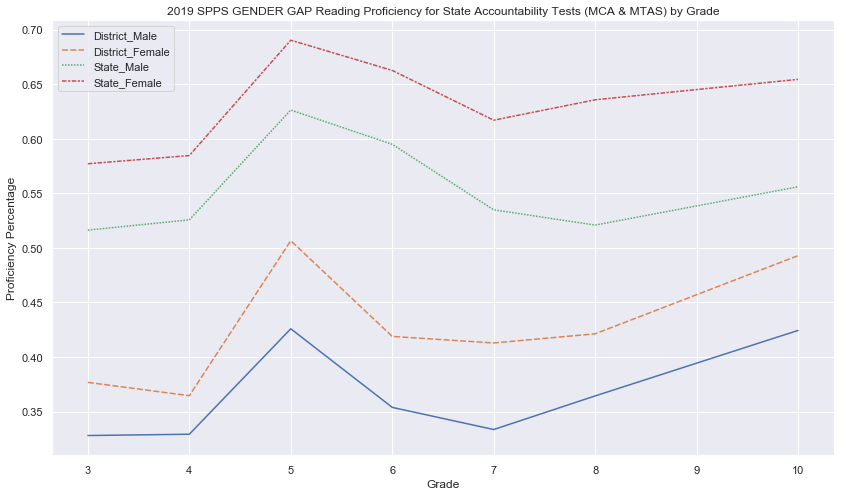

In [29]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS GENDER GAP Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_Male', 'District_Female','State_Male', 'State_Female']
bg=sns.lineplot(data=R_ESBaseProf[col])


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Gender.png', dpi=400)

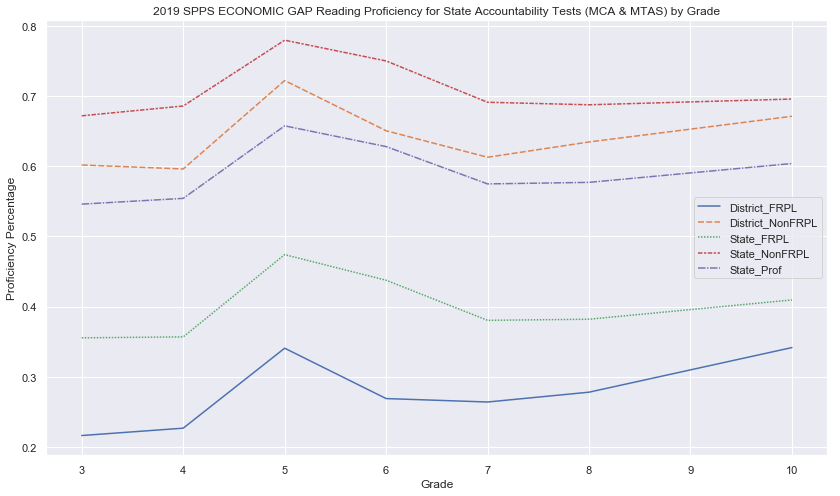

In [30]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS ECONOMIC GAP Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_FRPL', 'District_NonFRPL','State_FRPL', 'State_NonFRPL', 'State_Prof']
bg=sns.lineplot(data=R_ESBaseProf[col])


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Economic.png', dpi=400)

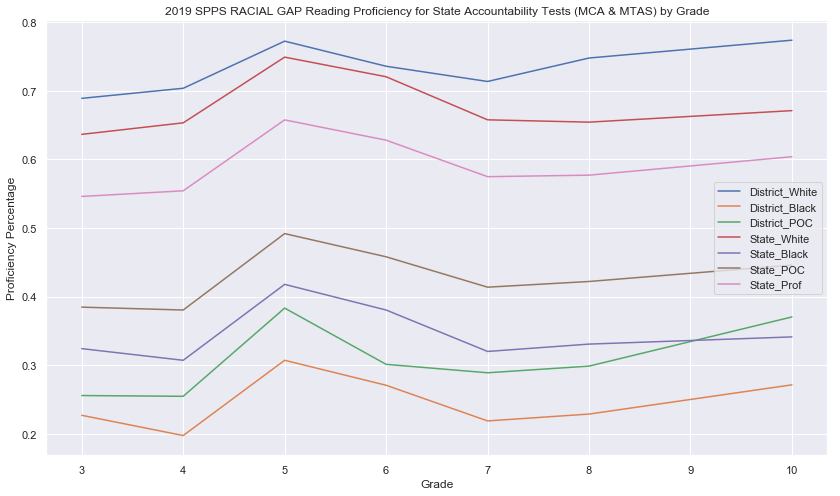

In [31]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS RACIAL GAP Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_White', 'District_Black','District_POC','State_White', 'State_Black','State_POC', 'State_Prof']
bg=sns.lineplot(data=R_ESBaseProf[col], dashes=False)


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Racial.png', dpi=400)

### Science Prep

In [23]:
Features= ['School','Grade','Prof']

#Base Level District
S_ESBaseProf= S_ESBase[Features].query('School=="Sp_District_All"')
S_ESBaseProf.drop(['School'], axis=1, inplace=True)
S_ESBaseProf.columns= ['Grade','Sp_District_Prof']

#Minneapolis
A= S_ESBase[Features].query('School=="Mpls_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Mpls_District_Prof']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Prof']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

##Male

Features= ['School','Grade','Male_Prof']

#District
A= S_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Male']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Male']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

##Female

Features= ['School','Grade','Female_Prof']

#District
A= S_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Female']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Female']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

##White

Features= ['School','Grade','White_Prof']

#District
A= S_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_White']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_White']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

##Black

Features= ['School','Grade','Black_Prof']

#District
A= S_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_Black']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_Black']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

##POC

Features= ['School','Grade','POC_Prof']

#District
A= S_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_POC']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_POC']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

##FRPL

Features= ['School','Grade','FRPL_Prof']

#District
A= S_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_FRPL']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_FRPL']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()


##NonFRPL

Features= ['School','Grade','NonFRPL_Prof']

#District
A= S_ESBase[Features].query('School=="Sp_District_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','District_NonFRPL']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()

#State
A= S_ESBase[Features].query('School=="State_All"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','State_NonFRPL']
S_ESBaseProf=S_ESBaseProf.set_index('Grade').join(A.set_index('Grade'))
S_ESBaseProf= S_ESBaseProf.reset_index()
S_ESBaseProf.drop(['Grade'], axis=1, inplace=True)
S_ESBaseProf.insert(0, "Grade", [5, 8, 11], True) 
S_ESBaseProf=S_ESBaseProf.set_index('Grade')


S_ESBaseProf

S_ESBaseProf.to_csv(r'Data/DisScience.csv',index=False)

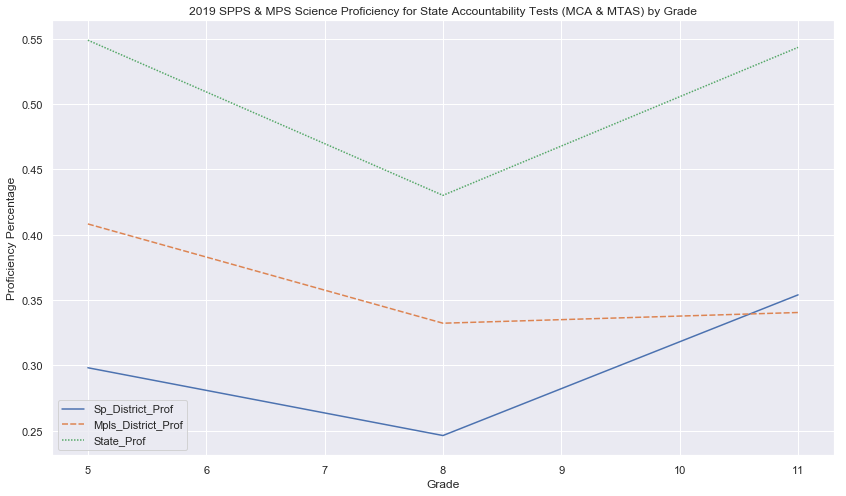

In [32]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS & MPS Science Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['Sp_District_Prof','Mpls_District_Prof', 'State_Prof']
bg=sns.lineplot(data=S_ESBaseProf[col])

# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/S_Prof.png', dpi=400)

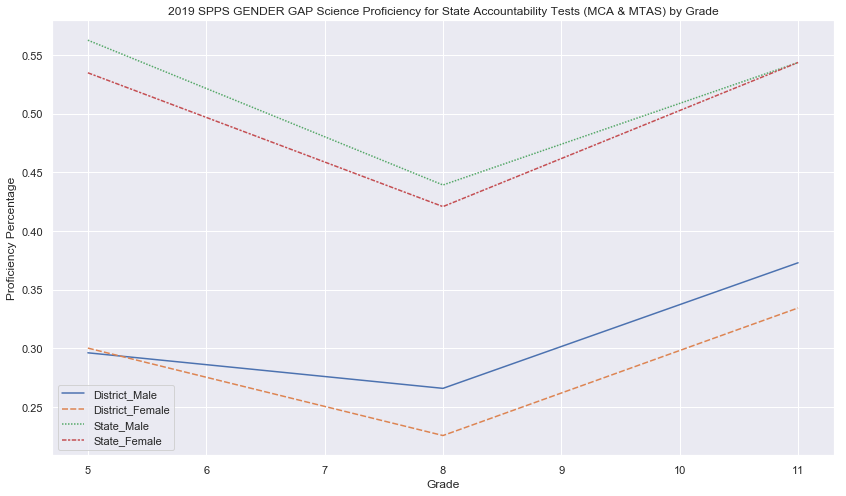

In [33]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS GENDER GAP Science Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_Male', 'District_Female','State_Male', 'State_Female']
bg=sns.lineplot(data=S_ESBaseProf[col])


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/S_Gender.png', dpi=400)

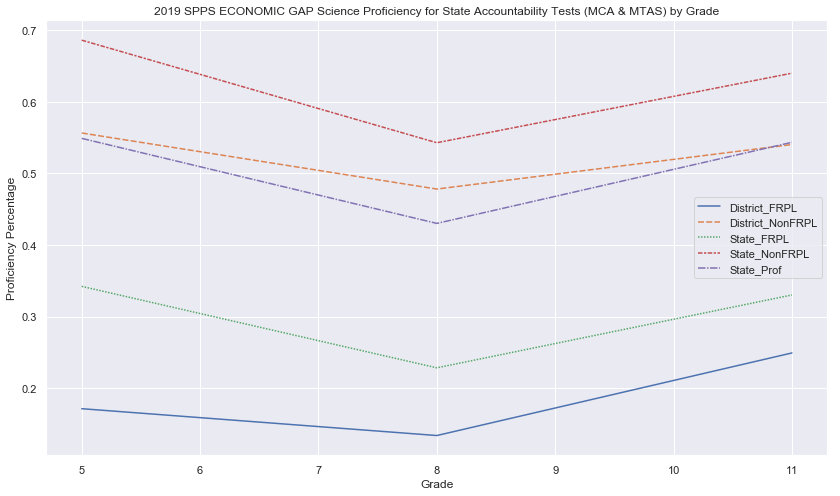

In [34]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS ECONOMIC GAP Science Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_FRPL', 'District_NonFRPL','State_FRPL', 'State_NonFRPL', 'State_Prof']
bg=sns.lineplot(data=S_ESBaseProf[col])


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/S_Economic.png', dpi=400)

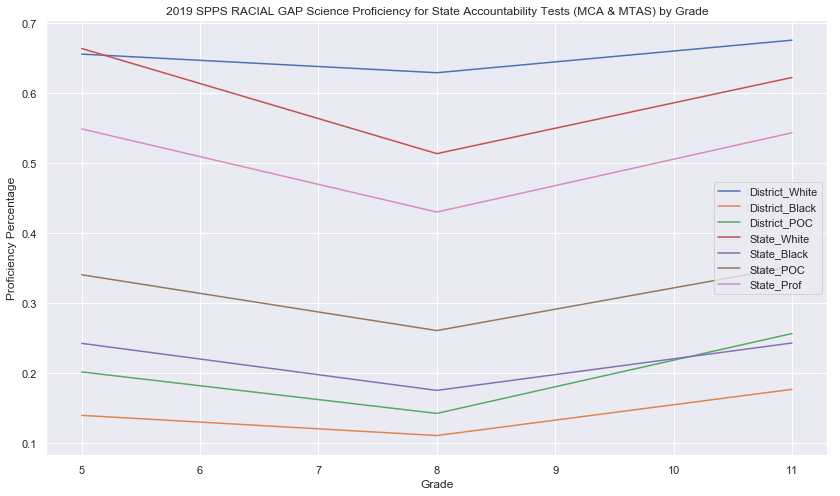

In [35]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS RACIAL GAP Science Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['District_White', 'District_Black','District_POC','State_White', 'State_Black','State_POC', 'State_Prof']
bg=sns.lineplot(data=S_ESBaseProf[col], dashes=False)


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/S_Racial.png', dpi=400)

### Intermediate Schools Breakdown

#### Setup

In [43]:
Features= ['School','Grade','Prof']

#Base Level District
M_ESIntProf= M_ESBase[Features].query('School=="State_All" and Grade in (6,7,8)')
M_ESIntProf.drop(['School'], axis=1, inplace=True)
M_ESIntProf.columns= ['Grade','State']

#'Battle Creek Middle'
A= M_ESBase[Features].query('School=="Battle Creek Middle"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BattleCreek']
M_ESIntProf=M_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
M_ESIntProf= M_ESIntProf.reset_index()

#Highland Park Middle School
A= M_ESBase[Features].query('School=="Highland Park Middle School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HighlandMiddle']
M_ESIntProf=M_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
M_ESIntProf= M_ESIntProf.reset_index()

#Murray Middle School
A= M_ESBase[Features].query('School=="Murray Middle School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Murray']
M_ESIntProf=M_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
M_ESIntProf= M_ESIntProf.reset_index()

#Parkway Montessori/Community Middle
A= M_ESBase[Features].query('School=="Parkway Montessori/Community Middle"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','ParkwayMontessori']
M_ESIntProf=M_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
M_ESIntProf= M_ESIntProf.reset_index()

#Farnsworth Aerospace Upper
A= M_ESBase[Features].query('School=="Farnsworth Aerospace Upper"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Farnsworth']
M_ESIntProf=M_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
M_ESIntProf= M_ESIntProf.reset_index()

#Ramsey Middle School
A= M_ESBase[Features].query('School=="Ramsey Middle School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','RamseyMiddle']
M_ESIntProf=M_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
#M_ESIntProf= M_ESIntProf.reset_index()

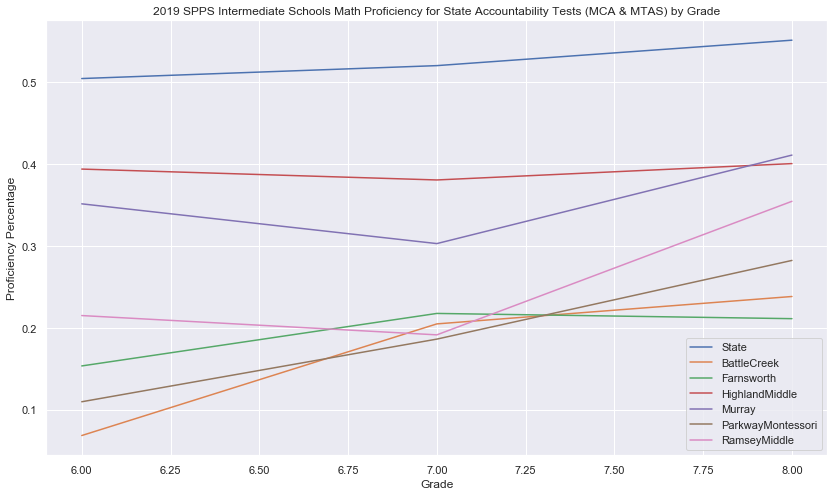

In [183]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS Intermediate Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','BattleCreek','Farnsworth','HighlandMiddle','Murray','ParkwayMontessori','RamseyMiddle']
bg=sns.lineplot(data=M_ESIntProf[col], dashes=False)


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Int.png', dpi=400)

In [184]:
Features= ['School','Grade','Prof']

#Base Level District
R_ESIntProf= R_ESBase[Features].query('School=="State_All" and Grade in (6,7,8)')
R_ESIntProf.drop(['School'], axis=1, inplace=True)
R_ESIntProf.columns= ['Grade','State']

#'Battle Creek Middle'
A= R_ESBase[Features].query('School=="Battle Creek Middle"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BattleCreek']
R_ESIntProf=R_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
R_ESIntProf= R_ESIntProf.reset_index()

#Highland Park Middle School
A= R_ESBase[Features].query('School=="Highland Park Middle School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HighlandMiddle']
R_ESIntProf=R_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
R_ESIntProf= R_ESIntProf.reset_index()

#Murray Middle School
A= R_ESBase[Features].query('School=="Murray Middle School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Murray']
R_ESIntProf=R_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
R_ESIntProf= R_ESIntProf.reset_index()

#Parkway Montessori/Community Middle
A= R_ESBase[Features].query('School=="Parkway Montessori/Community Middle"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','ParkwayMontessori']
R_ESIntProf=R_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
R_ESIntProf= R_ESIntProf.reset_index()

#Farnsworth Aerospace Upper
A= R_ESBase[Features].query('School=="Farnsworth Aerospace Upper"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Farnsworth']
R_ESIntProf=R_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
R_ESIntProf= R_ESIntProf.reset_index()

#Ramsey Middle School
A= R_ESBase[Features].query('School=="Ramsey Middle School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','RamseyMiddle']
R_ESIntProf=R_ESIntProf.set_index('Grade').join(A.set_index('Grade'))
#R_ESIntProf= R_ESIntProf.reset_index()

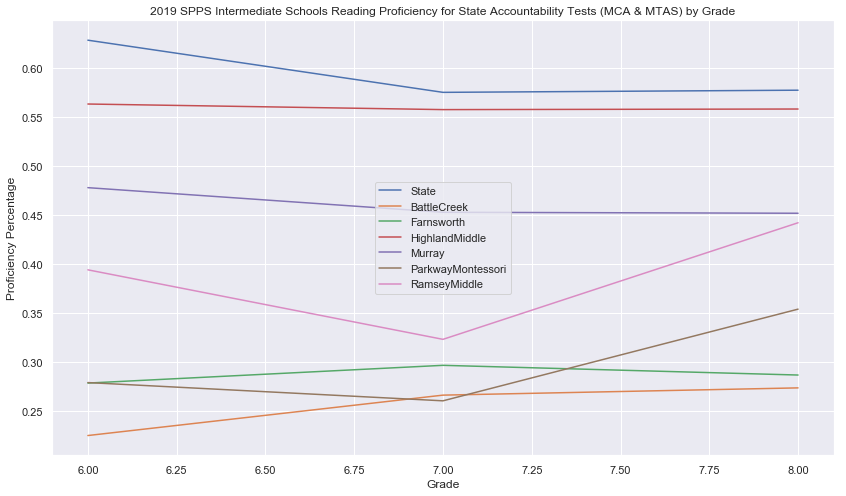

In [185]:
# Set the width and height of the figure
plt.figure(figsize=(14,8))

# Add title
plt.title("2019 SPPS Intermediate Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','BattleCreek','Farnsworth','HighlandMiddle','Murray','ParkwayMontessori','RamseyMiddle']
bg=sns.lineplot(data=R_ESIntProf[col], dashes=False)


# Add label for horizontal axis
plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Int.png', dpi=400)

### Elem Breakdown

In [40]:
Features= ['School','Grade','Prof']

#Base Level District
R_ESElemProf= R_ESBase[Features].query('School=="State_All" and Grade in (3,4,5)')
R_ESElemProf.drop(['School'], axis=1, inplace=True)
R_ESElemProf.columns= ['Grade','State']

#Horace Mann School
A= R_ESBase[Features].query('School=="Horace Mann School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Horace']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#St. Anthony Park Elementary
A= R_ESBase[Features].query('School=="St. Anthony Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','StAnthony']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Jie Ming Mandarin Immersion Academy
A= R_ESBase[Features].query('School=="Jie Ming Mandarin Immersion Academy"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','JieMandarin']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Randolph Heights Elementary
A= R_ESBase[Features].query('School=="Randolph Heights Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','RandolphHeights']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#L'Etoile Du Nord French Immersion U
R_ESBase['School']= R_ESBase['School'].replace({"L'E":"LE"})
A= R_ESBase[Features].query('School=="LEtoile Du Nord French Immersion U"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LetoileU_French']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Expo For Excellence Elementary Sch
A= R_ESBase[Features].query('School=="Expo For Excellence Elementary Sch"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Expo']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Jj Hill Montessori
A= R_ESBase[Features].query('School=="Jj Hill Montessori"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','JjHill_Montessori']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

# Capitol Hill Magnet/Rondo
A= R_ESBase[Features].query('School=="Capitol Hill Magnet/Rondo"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CapitolHill']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#L'Etoile Du Nord French Immersion L
A= R_ESBase[Features].query('School=="LEtoile Du Nord French Immersion L"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LEtoileL_French']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Chelsea Heights Elementary
A= R_ESBase[Features].query('School=="Chelsea Heights Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','ChelseaHeights']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Adams Magnet Elementary
A= R_ESBase[Features].query('School=="Adams Magnet Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','AdamsMagnet']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Groveland Park Elementary
A= R_ESBase[Features].query('School=="Groveland Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Groveland']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

# Nokomis Montessori South Campus
A= R_ESBase[Features].query('School=="Nokomis Montessori South Campus"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','NokomisSouth_Montessori']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

# Nokomis Montessori North Campus
A= R_ESBase[Features].query('School=="Nokomis Montessori North Campus"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','NokomisNorth_Montessori']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()


#Linwood Monroe Arts Plus Upper
A= R_ESBase[Features].query('School=="Linwood Monroe Arts Plus Upper"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LinwoodUpper']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Highland Park Elementary
A= R_ESBase[Features].query('School=="Highland Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Highland']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Linwood Monroe Arts Plus Lower
A= R_ESBase[Features].query('School=="Linwood Monroe Arts Plus Lower"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LinwoodLower']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Galtier Elementary School
A= R_ESBase[Features].query('School=="Galtier Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Galtier']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Crossroads Montessori
A= R_ESBase[Features].query('School=="Crossroads Montessori"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CrossroadsMontessori']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()


#The Heights Community School
A= R_ESBase[Features].query('School=="The Heights Community School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HeightsCommunity']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Cherokee Heights Elementary School
A= R_ESBase[Features].query('School=="Cherokee Heights Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CherokeeHeights']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Farnsworth Aerospace Lower
A= R_ESBase[Features].query('School=="Farnsworth Aerospace Lower"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','FarnsworthLower']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Battle Creek Elementary School
A= R_ESBase[Features].query('School=="Battle Creek Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BattleCreek']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Hamline Elementary School
A= R_ESBase[Features].query('School=="Hamline Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Hamline']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Eastern Heights Elementary
A= R_ESBase[Features].query('School=="Eastern Heights Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','EasternHeights']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Crossroads Science Program
A= R_ESBase[Features].query('School=="Crossroads Science Program"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CrossroadsScience']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Frost Lake Elementary School
A= R_ESBase[Features].query('School=="Frost Lake Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','FrostLake']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Riverview West School Of Excellence
A= R_ESBase[Features].query('School=="Riverview West School Of Excellence"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','RiverviewWest']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Como Park Elementary
A= R_ESBase[Features].query('School=="Como Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','ComoPark']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Four Seasons Elementary
A= R_ESBase[Features].query('School=="Four Seasons Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','FourSeasons']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Jackson Preparatory Elementary
A= R_ESBase[Features].query('School=="Jackson Preparatory Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Jackson']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Phalen Lake Hmong Studies Magnet
A= R_ESBase[Features].query('School=="Phalen Lake Hmong Studies Magnet"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','PhalenLake_Hmong']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

# Benjamin E Mays Magnet
A= R_ESBase[Features].query('School=="Benjamin E Mays Magnet"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BenjaminMays']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Maxfield Elementary School
A= R_ESBase[Features].query('School=="Maxfield Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Maxfield']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Daytons Bluff Elementary
A= R_ESBase[Features].query('School=="Daytons Bluff Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','DaytonsBluff']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#American Indian Magnet School
A= R_ESBase[Features].query('School=="American Indian Magnet School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','AmericanIndian_Magnet']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Paul & Sheila Wellstone Elementary
A= R_ESBase[Features].query('School=="Paul & Sheila Wellstone Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','PaulWellstone']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Highwood Hills Elementary
A= R_ESBase[Features].query('School=="Highwood Hills Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HighwoodHills']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()


#Obama Service Learning Elementary
A= R_ESBase[Features].query('School=="Obama Service Learning Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Obama']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Mississippi Creative Arts Elementary
A= R_ESBase[Features].query('School=="Mississippi Creative Arts Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','MississippiArts']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()


#John A. Johnson Achievement Plus El.
A= R_ESBase[Features].query('School=="John A. Johnson Achievement Plus El."')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','JohnJohnson']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()


#Hazel Park Preparatory Academy
A= R_ESBase[Features].query('School=="Hazel Park Preparatory Academy"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HazelPark']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Saint Paul Music Academy
A= R_ESBase[Features].query('School=="Saint Paul Music Academy"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','SaintPaulMusic']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
R_ESElemProf= R_ESElemProf.reset_index()

#Bruce F Vento Elementary
A= R_ESBase[Features].query('School=="Bruce F Vento Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BruceVento']
R_ESElemProf=R_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
#R_ESElemProf= R_ESElemProf.reset_index()

R_ESElemProf

,State,Horace,StAnthony,JieMandarin,RandolphHeights,LetoileU_French,Expo,JjHill_Montessori,CapitolHill,LEtoileL_French,ChelseaHeights,AdamsMagnet,Groveland,NokomisSouth_Montessori,NokomisNorth_Montessori,LinwoodUpper,Highland,LinwoodLower,Galtier,CrossroadsMontessori,HeightsCommunity,CherokeeHeights,FarnsworthLower,BattleCreek,Hamline,EasternHeights,CrossroadsScience,FrostLake,RiverviewWest,ComoPark,FourSeasons,Jackson,PhalenLake_Hmong,BenjaminMays,Maxfield,DaytonsBluff,AmericanIndian_Magnet,PaulWellstone,HighwoodHills,Obama,MississippiArts,JohnJohnson,HazelPark,SaintPaulMusic,BruceVento
Grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.0,0.5461,0.7544,0.6265,0.8065,0.7179,NaN,0.6346,0.4906,0.7059,NaN,0.5946,0.4643,0.5273,0.2308,0.2600,NaN,0.3134,0.4304,0.3462,0.4194,0.2097,0.1212,0.3232,0.2769,0.3333,0.2439,0.3864,0.2000,0.1525,0.2154,0.1250,0.1905,0.2857,0.1695,0.0455,0.1800,0.0290,0.2048,0.0541,0.1818,0.1720,0.2000,0.3261,0.3441,0.1216
4.0,0.5543,0.7541,0.7059,0.9643,0.7391,NaN,0.5619,0.5490,0.7324,NaN,0.5070,0.4405,0.4444,0.4359,0.2667,NaN,0.4138,0.2949,0.0870,0.3704,0.1395,0.1935,0.3271,0.2877,0.1818,0.2553,0.3137,0.2250,0.2373,0.4667,0.1538,0.1091,0.2826,0.1250,0.2368,0.1628,0.0606,0.2118,0.1750,0.1481,0.1683,0.0816,0.1509,0.2381,0.1831
5.0,0.6577,0.8077,0.6901,0.8095,0.8507,NaN,0.6346,0.5510,0.7095,NaN,0.5867,0.5258,0.6625,0.4865,0.6667,0.3659,0.5556,NaN,0.2727,0.4643,0.3857,0.3333,NaN,0.5077,0.4773,0.3333,0.3529,0.3291,0.1765,0.4861,0.1733,0.3725,0.4124,0.2879,0.2381,0.2041,0.1791,0.3548,0.4167,0.1739,0.4430,0.3077,0.1887,0.3727,0.3494


In [181]:
Features= ['School','Grade','Prof']

#Base Level District
M_ESElemProf= M_ESBase[Features].query('School=="State_All" and Grade in (3,4,5)')
M_ESElemProf.drop(['School'], axis=1, inplace=True)
M_ESElemProf.columns= ['Grade','State']

#Horace Mann School
A= M_ESBase[Features].query('School=="Horace Mann School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Horace']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#St. Anthony Park Elementary
A= M_ESBase[Features].query('School=="St. Anthony Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','StAnthony']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Jie Ming Mandarin Immersion Academy
A= M_ESBase[Features].query('School=="Jie Ming Mandarin Immersion Academy"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','JieMandarin']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Randolph Heights Elementary
A= M_ESBase[Features].query('School=="Randolph Heights Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','RandolphHeights']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#L'Etoile Du Nord French Immersion U
M_ESBase['School']= M_ESBase['School'].replace({"L'E":"LE"})
A= M_ESBase[Features].query('School=="LEtoile Du Nord French Immersion U"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LetoileU_French']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Expo For Excellence Elementary Sch
A= M_ESBase[Features].query('School=="Expo For Excellence Elementary Sch"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Expo']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Jj Hill Montessori
A= M_ESBase[Features].query('School=="Jj Hill Montessori"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','JjHill_Montessori']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

# Capitol Hill Magnet/Rondo
A= M_ESBase[Features].query('School=="Capitol Hill Magnet/Rondo"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CapitolHill']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#L'Etoile Du Nord French Immersion L
A= M_ESBase[Features].query('School=="LEtoile Du Nord French Immersion L"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LEtoileL_French']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Chelsea Heights Elementary
A= M_ESBase[Features].query('School=="Chelsea Heights Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','ChelseaHeights']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Adams Magnet Elementary
A= M_ESBase[Features].query('School=="Adams Magnet Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','AdamsMagnet']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Groveland Park Elementary
A= M_ESBase[Features].query('School=="Groveland Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Groveland']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

# Nokomis Montessori South Campus
A= M_ESBase[Features].query('School=="Nokomis Montessori South Campus"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','NokomisSouth_Montessori']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

# Nokomis Montessori North Campus
A= M_ESBase[Features].query('School=="Nokomis Montessori North Campus"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','NokomisNorth_Montessori']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()


#Linwood Monroe Arts Plus Upper
A= M_ESBase[Features].query('School=="Linwood Monroe Arts Plus Upper"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LinwoodUpper']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Highland Park Elementary
A= M_ESBase[Features].query('School=="Highland Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Highland']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Linwood Monroe Arts Plus Lower
A= M_ESBase[Features].query('School=="Linwood Monroe Arts Plus Lower"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','LinwoodLower']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Galtier Elementary School
A= M_ESBase[Features].query('School=="Galtier Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Galtier']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Crossroads Montessori
A= M_ESBase[Features].query('School=="Crossroads Montessori"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CrossroadsMontessori']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()


#The Heights Community School
A= M_ESBase[Features].query('School=="The Heights Community School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HeightsCommunity']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Cherokee Heights Elementary School
A= M_ESBase[Features].query('School=="Cherokee Heights Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CherokeeHeights']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Farnsworth Aerospace Lower
A= M_ESBase[Features].query('School=="Farnsworth Aerospace Lower"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','FarnsworthLower']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Battle Creek Elementary School
A= M_ESBase[Features].query('School=="Battle Creek Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BattleCreek']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Hamline Elementary School
A= M_ESBase[Features].query('School=="Hamline Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Hamline']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Eastern Heights Elementary
A= M_ESBase[Features].query('School=="Eastern Heights Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','EasternHeights']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Crossroads Science Program
A= M_ESBase[Features].query('School=="Crossroads Science Program"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','CrossroadsScience']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Frost Lake Elementary School
A= M_ESBase[Features].query('School=="Frost Lake Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','FrostLake']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Riverview West School Of Excellence
A= M_ESBase[Features].query('School=="Riverview West School Of Excellence"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','RiverviewWest']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Como Park Elementary
A= M_ESBase[Features].query('School=="Como Park Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','ComoPark']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Four Seasons Elementary
A= M_ESBase[Features].query('School=="Four Seasons Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','FourSeasons']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Jackson Preparatory Elementary
A= M_ESBase[Features].query('School=="Jackson Preparatory Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Jackson']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Phalen Lake Hmong Studies Magnet
A= M_ESBase[Features].query('School=="Phalen Lake Hmong Studies Magnet"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','PhalenLake_Hmong']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

# Benjamin E Mays Magnet
A= M_ESBase[Features].query('School=="Benjamin E Mays Magnet"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BenjaminMays']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Maxfield Elementary School
A= M_ESBase[Features].query('School=="Maxfield Elementary School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Maxfield']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Daytons Bluff Elementary
A= M_ESBase[Features].query('School=="Daytons Bluff Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','DaytonsBluff']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#American Indian Magnet School
A= M_ESBase[Features].query('School=="American Indian Magnet School"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','AmericanIndian_Magnet']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Paul & Sheila Wellstone Elementary
A= M_ESBase[Features].query('School=="Paul & Sheila Wellstone Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','PaulWellstone']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Highwood Hills Elementary
A= M_ESBase[Features].query('School=="Highwood Hills Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HighwoodHills']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()


#Obama Service Learning Elementary
A= M_ESBase[Features].query('School=="Obama Service Learning Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','Obama']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Mississippi Creative Arts Elementary
A= M_ESBase[Features].query('School=="Mississippi Creative Arts Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','MississippiArts']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()


#John A. Johnson Achievement Plus El.
A= M_ESBase[Features].query('School=="John A. Johnson Achievement Plus El."')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','JohnJohnson']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()


#Hazel Park Preparatory Academy
A= M_ESBase[Features].query('School=="Hazel Park Preparatory Academy"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','HazelPark']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Saint Paul Music Academy
A= M_ESBase[Features].query('School=="Saint Paul Music Academy"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','SaintPaulMusic']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
M_ESElemProf= M_ESElemProf.reset_index()

#Bruce F Vento Elementary
A= M_ESBase[Features].query('School=="Bruce F Vento Elementary"')
A.drop(['School'], axis=1, inplace=True)
A.columns= ['Grade','BruceVento']
M_ESElemProf=M_ESElemProf.set_index('Grade').join(A.set_index('Grade'))
#M_ESElemProf= M_ESElemProf.reset_index()

M_ESElemProf

,State,Horace,StAnthony,JieMandarin,RandolphHeights,LetoileU_French,Expo,JjHill_Montessori,CapitolHill,LEtoileL_French,ChelseaHeights,AdamsMagnet,Groveland,NokomisSouth_Montessori,NokomisNorth_Montessori,LinwoodUpper,Highland,LinwoodLower,Galtier,CrossroadsMontessori,HeightsCommunity,CherokeeHeights,FarnsworthLower,BattleCreek,Hamline,EasternHeights,CrossroadsScience,FrostLake,RiverviewWest,ComoPark,FourSeasons,Jackson,PhalenLake_Hmong,BenjaminMays,Maxfield,DaytonsBluff,AmericanIndian_Magnet,PaulWellstone,HighwoodHills,Obama,MississippiArts,JohnJohnson,HazelPark,SaintPaulMusic,BruceVento
Grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3.0,0.6560,0.8421,0.6627,0.9032,0.8333,NaN,0.6346,0.3519,0.8000,NaN,0.5946,0.5357,0.5741,0.2308,0.2653,NaN,0.3731,0.3924,0.3462,0.4333,0.3492,0.2059,0.3636,0.3788,0.4444,0.1667,0.3810,0.2250,0.1250,0.2769,0.1528,0.2683,0.4286,0.2586,0.1818,0.2041,0.1159,0.2169,0.1081,0.2581,0.2283,0.1636,0.3333,0.3118,0.2466
4.0,0.6387,0.7869,0.7647,1.0000,0.7826,NaN,0.7009,0.4118,0.8156,NaN,0.4930,0.4167,0.5370,0.3590,0.3333,NaN,0.4310,0.2692,0.0870,0.2593,0.2069,0.0667,0.3611,0.4521,0.2500,0.2979,0.5882,0.2625,0.1552,0.5067,0.1667,0.1273,0.3696,0.1852,0.1579,0.2093,0.0758,0.1905,0.3659,0.1481,0.2157,0.1200,0.2453,0.4095,0.2464
5.0,0.5204,0.5769,0.5634,0.8571,0.6418,NaN,0.4954,0.1837,0.5238,NaN,0.4933,0.2653,0.5125,0.1622,0.3333,0.2289,0.3194,NaN,0.0000,0.1429,0.2000,0.2222,NaN,0.4848,0.1556,0.1765,0.2549,0.2179,0.0612,0.4366,0.1333,0.1569,0.3367,0.0635,0.0952,0.1250,0.0746,0.1789,0.1389,0.0652,0.3038,0.1321,0.0377,0.3273,0.2771


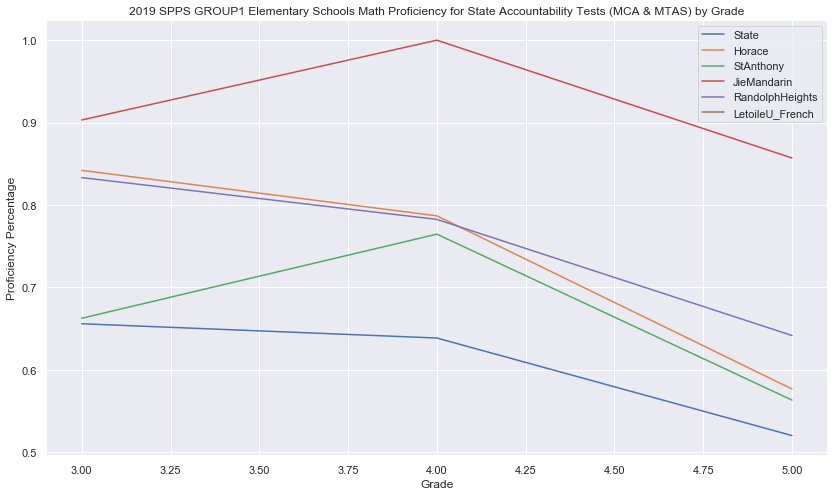

In [187]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP1 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Horace', 'StAnthony', 'JieMandarin','RandolphHeights', 'LetoileU_French']
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem1.png', dpi=400)

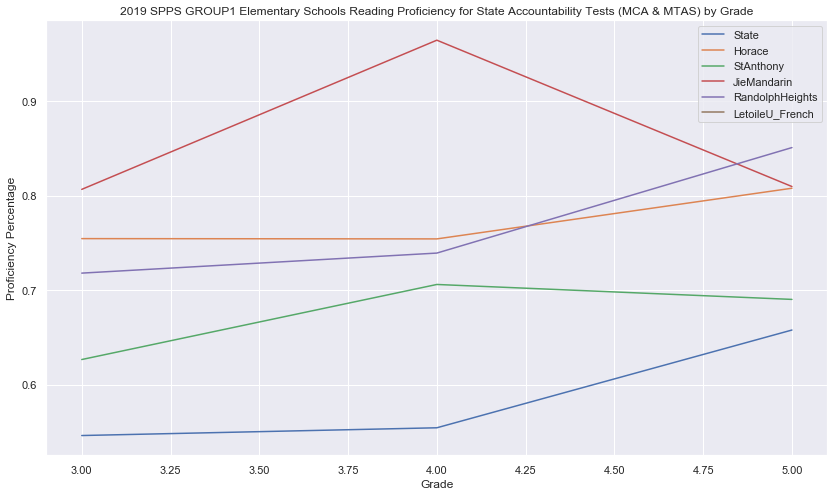

In [188]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP1 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Horace', 'StAnthony', 'JieMandarin','RandolphHeights', 'LetoileU_French']
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem1.png', dpi=400)

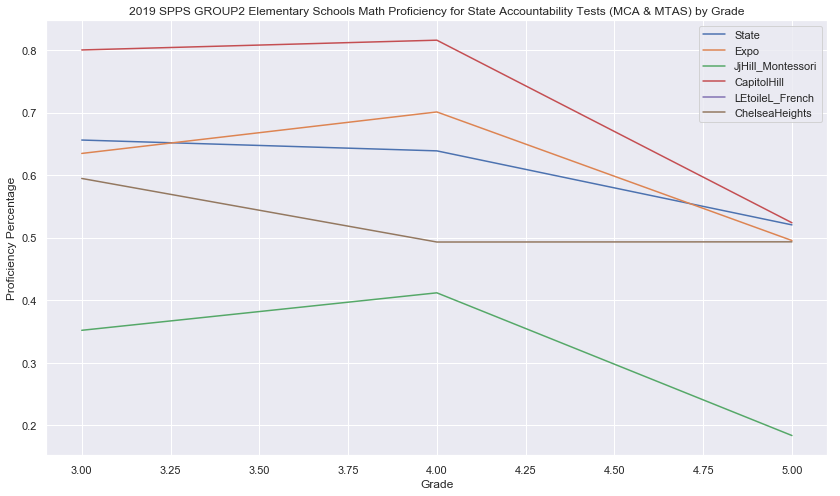

In [189]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP2 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Expo','JjHill_Montessori', 'CapitolHill', 'LEtoileL_French','ChelseaHeights']
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem2.png', dpi=400)

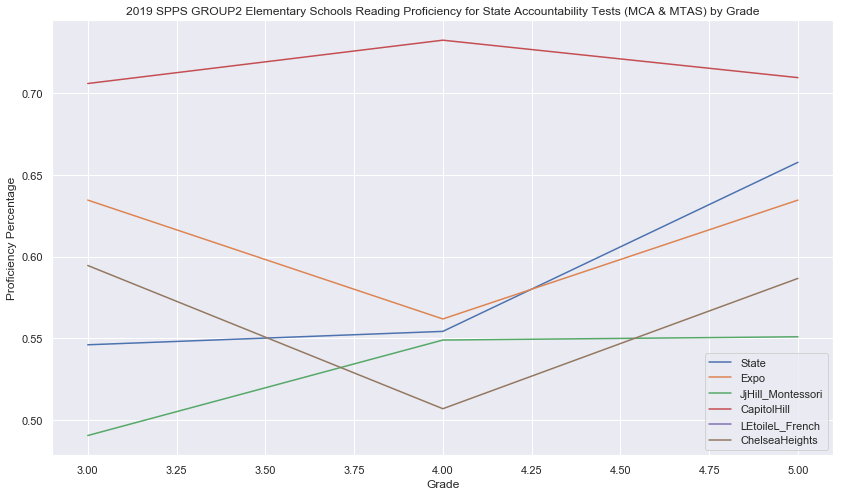

In [190]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP2 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Expo','JjHill_Montessori', 'CapitolHill', 'LEtoileL_French','ChelseaHeights']
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem2.png', dpi=400)

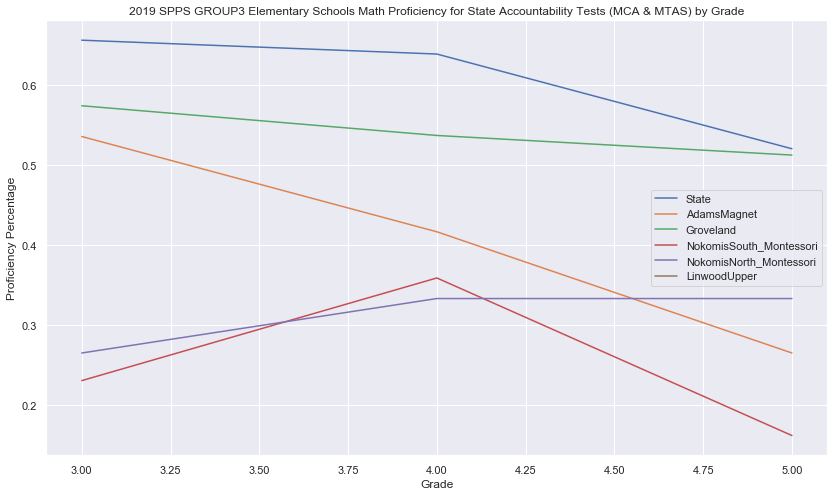

In [191]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP3 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','AdamsMagnet', 'Groveland','NokomisSouth_Montessori', 'NokomisNorth_Montessori','LinwoodUpper']
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem3.png', dpi=400)

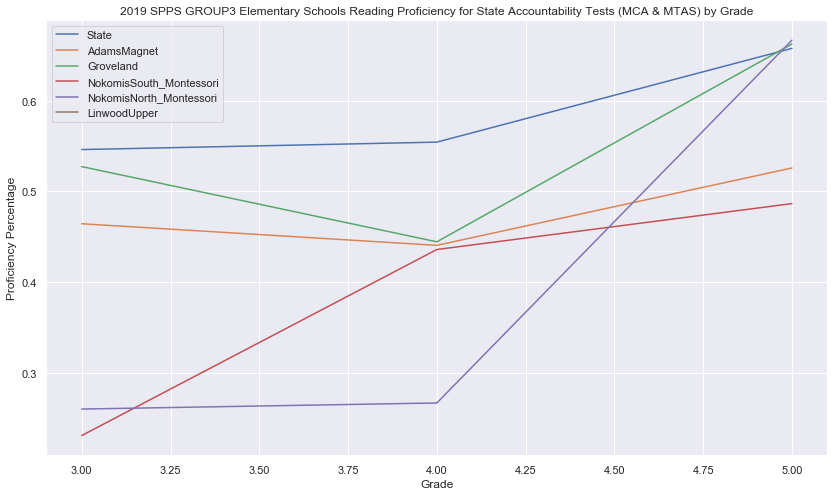

In [192]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP3 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','AdamsMagnet', 'Groveland','NokomisSouth_Montessori', 'NokomisNorth_Montessori','LinwoodUpper']
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem3.png', dpi=400)

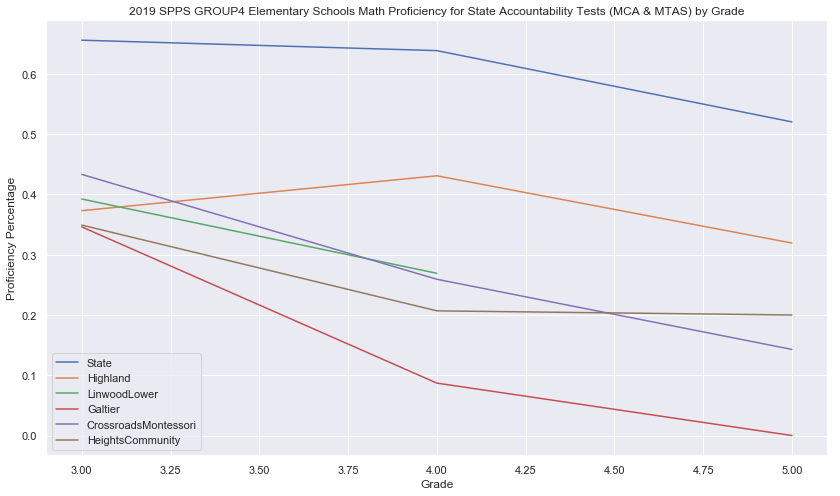

In [193]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP4 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Highland', 'LinwoodLower','Galtier', 'CrossroadsMontessori', 'HeightsCommunity']
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem4.png', dpi=400)

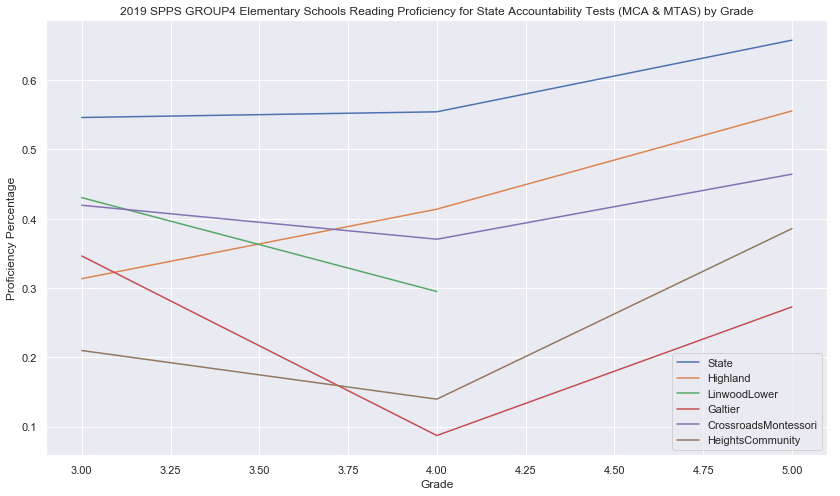

In [194]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP4 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Highland', 'LinwoodLower','Galtier', 'CrossroadsMontessori', 'HeightsCommunity']
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem4.png', dpi=400)

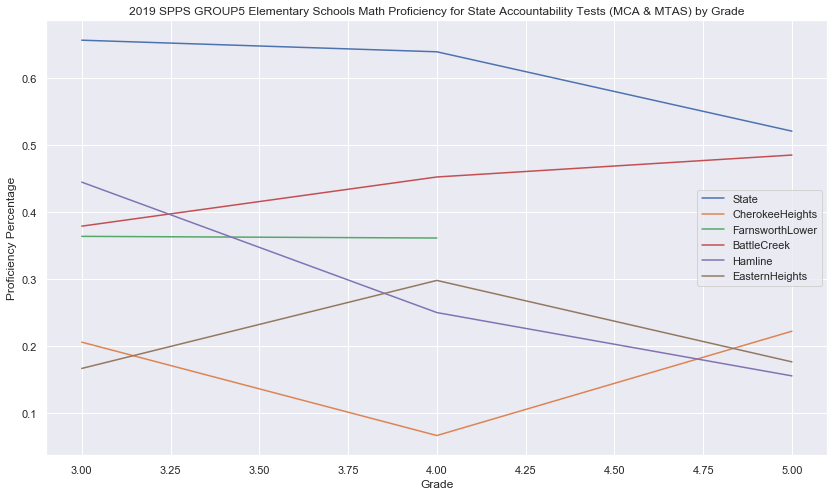

In [195]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP5 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','CherokeeHeights', 'FarnsworthLower', 'BattleCreek','Hamline', 'EasternHeights']
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem5.png', dpi=400)

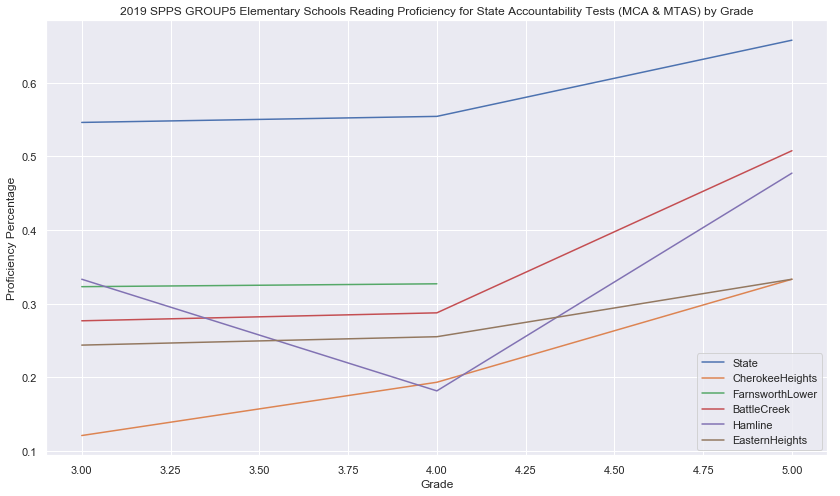

In [196]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP5 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','CherokeeHeights', 'FarnsworthLower', 'BattleCreek','Hamline', 'EasternHeights']
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem5.png', dpi=400)

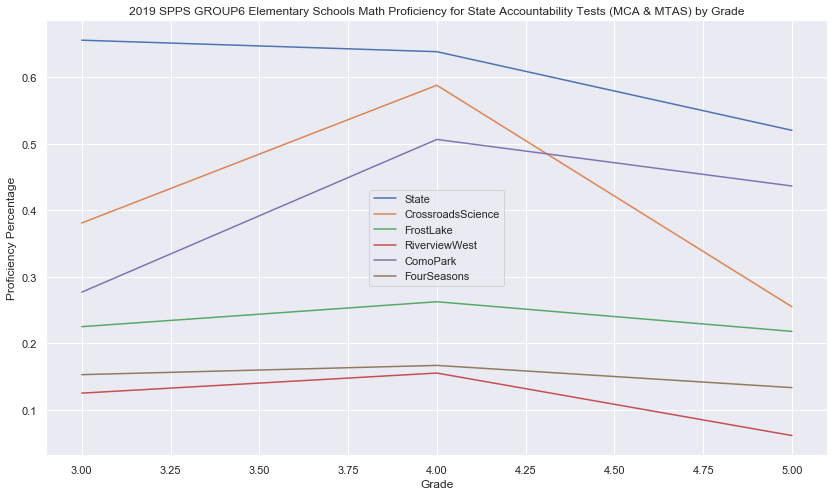

In [197]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP6 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','CrossroadsScience','FrostLake', 'RiverviewWest', 'ComoPark','FourSeasons'] 
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem6.png', dpi=400)

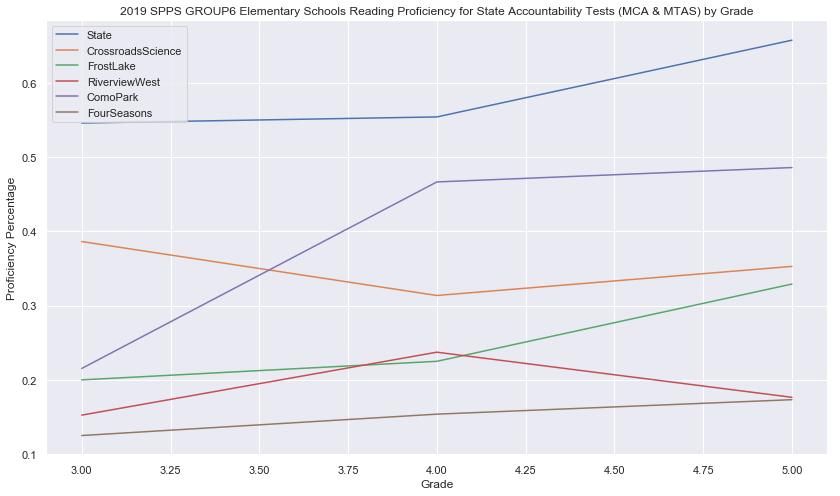

In [198]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP6 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','CrossroadsScience','FrostLake', 'RiverviewWest', 'ComoPark','FourSeasons'] 
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem6.png', dpi=400)

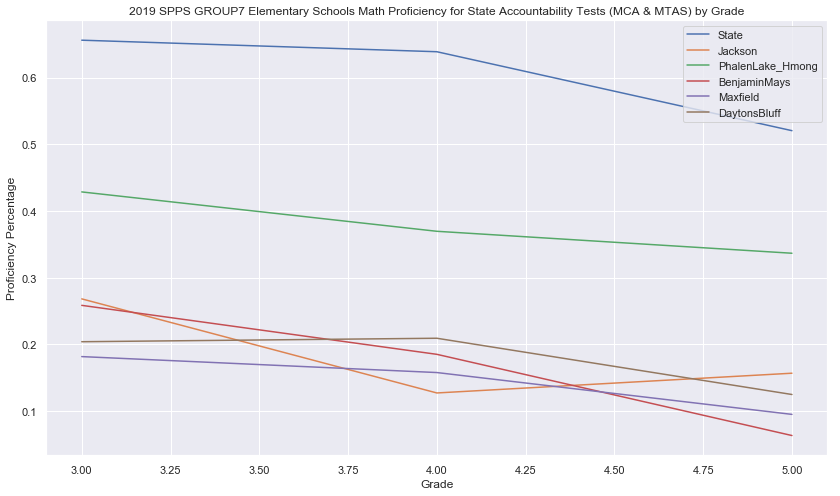

In [199]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP7 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Jackson', 'PhalenLake_Hmong','BenjaminMays', 'Maxfield', 'DaytonsBluff']
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem7.png', dpi=400)

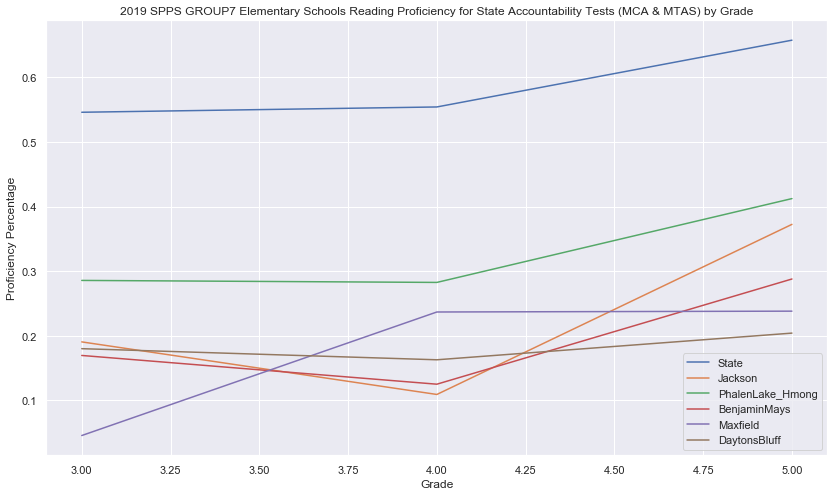

In [200]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP7 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','Jackson', 'PhalenLake_Hmong','BenjaminMays', 'Maxfield', 'DaytonsBluff']
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem7.png', dpi=400)

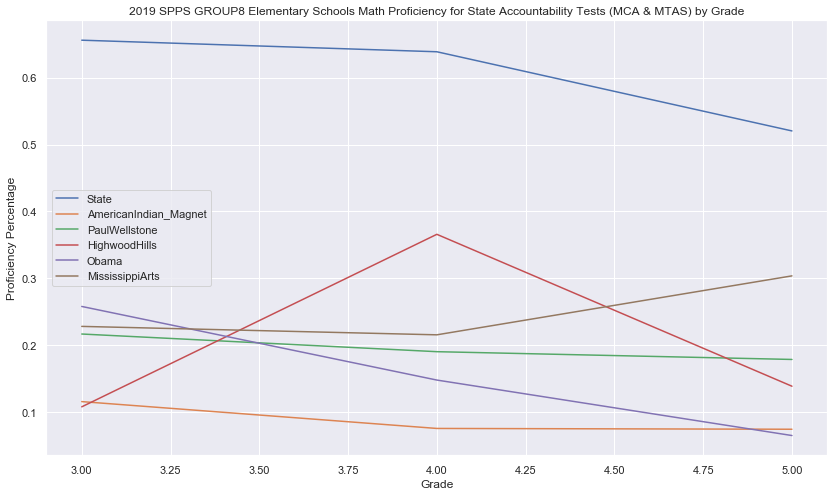

In [201]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP8 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','AmericanIndian_Magnet', 'PaulWellstone','HighwoodHills', 'Obama', 'MississippiArts']  
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem8.png', dpi=400)

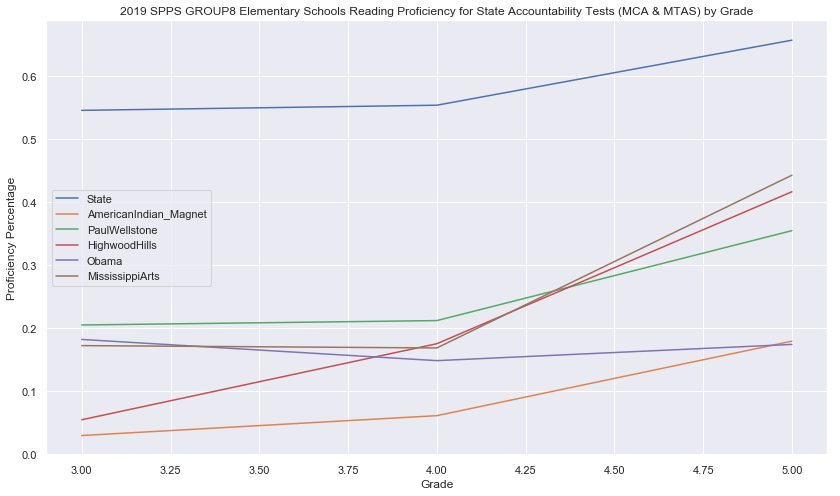

In [202]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP8 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','AmericanIndian_Magnet', 'PaulWellstone','HighwoodHills', 'Obama', 'MississippiArts']  
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem8.png', dpi=400)

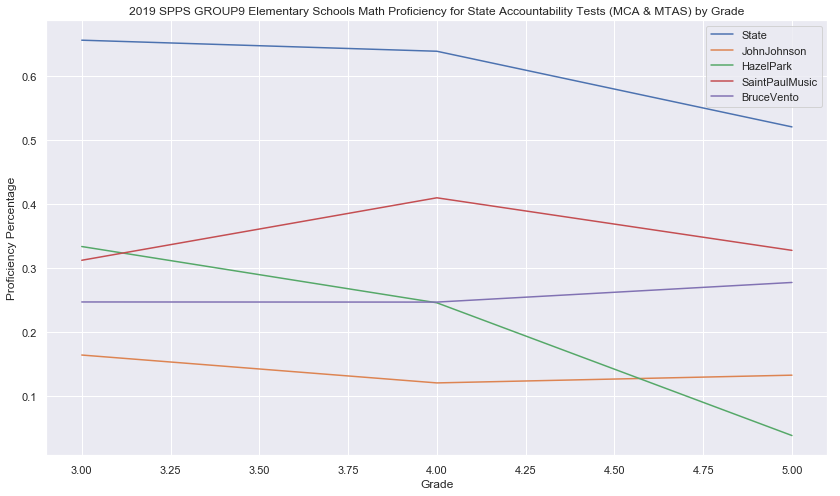

In [203]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP9 Elementary Schools Math Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','JohnJohnson', 'HazelPark', 'SaintPaulMusic','BruceVento'] 
bg=sns.lineplot(data=M_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/M_Elem9.png', dpi=400)

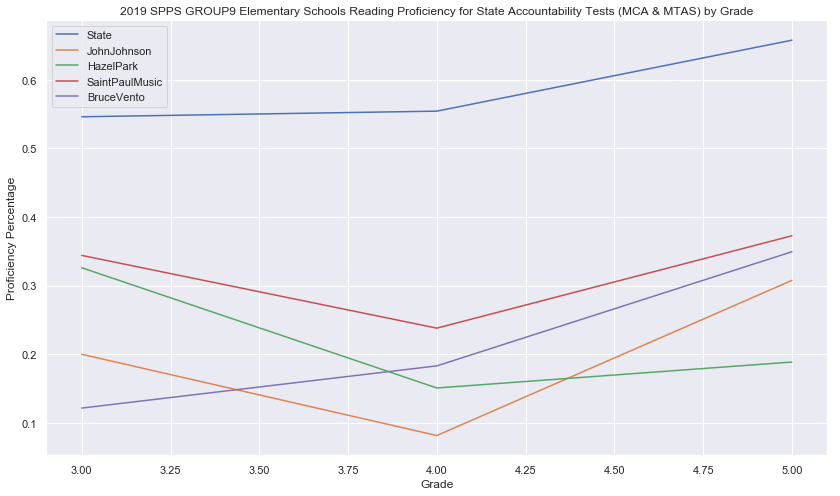

In [204]:
plt.figure(figsize=(14,8)) # Set the width and height of the figure

plt.title("2019 SPPS GROUP9 Elementary Schools Reading Proficiency for State Accountability Tests (MCA & MTAS) by Grade")
col= ['State','JohnJohnson', 'HazelPark', 'SaintPaulMusic','BruceVento'] 
bg=sns.lineplot(data=R_ESElemProf[col], dashes=False)

plt.xlabel("Grade")
plt.ylabel("Proficiency Percentage")

figure = bg.get_figure() 
figure.savefig('Graphs/R_Elem9.png', dpi=400)

## School Level Breakdown w/ Grading Quartiles

The plan is to break down proficiency of schools as a whole while maintaining the demographic attributes of respective grades.
Here are the steps.


1) Flatten the categories of interest and attach it to base table
2) Aggregate by School and create percentage tables


In [227]:
MAll['Student_Group'].value_counts()

All students                                                        9658
Students with no active duty parent                                 9658
Students who are not migrant                                        9637
Students who do not have limited or interrupted formal education    9637
Students not experiencing homelessness                              9626
Not English learners                                                9617
Male students                                                       9483
Students eligible for free/reduced-price meals                      9414
Students receiving special education services                       9287
Female students                                                     9161
Students not eligible for free/reduced-price meals                  9043
White students                                                      8998
Students not receiving special education services                   8856
Hispanic or Latino students                        

In [237]:
#Step 1: Create the Base table which has information of "all students" 

A=MAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")
A['Pass_Count']= A.M_Count + A.E_Count #Create PassCount
Features=["School_Name","School_Num","Grade","Tot_Tested","Pass_Count",'Student_Group']
Base= A[Features].query('Student_Group=="All students"')
Base.drop(['Student_Group'], axis=1, inplace=True)

#Base=B[Features]
#Step 2: Flatten the categories of interest and attach it to base table


Features=["School_Name","Grade",'Student_Group',"Tot_Tested","Pass_Count"]
#A=MAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")

#Asian Students
C=A[Features].query("Student_Group=='Asian students'")
C.columns= ['School_Name','Grade','Student_Group','A_Tot','A_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])


#Black Students
C=A[Features].query("Student_Group=='Black or African American students'")
C.columns= ['School_Name','Grade','Student_Group','B_Tot','B_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#White Students
C=A[Features].query("Student_Group=='White students'")
C.columns= ['School_Name','Grade','Student_Group','W_Tot','W_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#ELL Students
C=A[Features].query("Student_Group=='English learners'")
C.columns= ['School_Name','Grade','Student_Group','E_Tot','E_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#SPED Students
C=A[Features].query("Student_Group=='Students receiving special education services'")
C.columns= ['School_Name','Grade','Student_Group','R_Tot','R_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','F_Tot','F_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','NF_Tot','NF_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
Base=Base.fillna(0)

# Step 3: Aggregate by School and create percentage tables


Fin=Base.query('School_Name!="Sp_District_All"').groupby(['School_Name']).sum().reset_index()
Fin['Proficiency']=round((Fin.Pass_Count/Fin.Tot_Tested)*100,2)
Fin['White%']=round((Fin.W_Tot/Fin.Tot_Tested)*100,0)
Fin['White_Proficiency%']=round((Fin.W_Count/Fin.W_Tot)*100,2)
Fin['Asian%']=round((Fin.A_Tot/Fin.Tot_Tested)*100,0)
Fin['Asian_Proficiency%']=round((Fin.A_Count/Fin.A_Tot)*100,2)
Fin['Black%']=round((Fin.B_Tot/Fin.Tot_Tested)*100,0)
Fin['Black_Proficiency%']=round((Fin.B_Count/Fin.B_Tot)*100,2)
Fin['ELL%']=round((Fin.E_Tot/Fin.Tot_Tested)*100,0)
Fin['SPED%']=round((Fin.R_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL_Proficiency%']=round((Fin.F_Count/Fin.F_Tot)*100,2)
Fin['NonFRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['NonFRPL_Proficiency%']=round((Fin.NF_Count/Fin.NF_Tot)*100,2)
Fin=Fin.fillna(0)

#Create Functions for two ranking Categories

# Used to find average District Values
SP1= Base.query('School_Name=="Sp_District_All" and Grade in (3,4,5)').groupby(['School_Name']).sum().reset_index()
SP2= Base.query('School_Name=="Sp_District_All" and Grade in (6,7,8)').groupby(['School_Name']).sum().reset_index()
SP3=pd.concat([SP1,SP2], ignore_index=True)
SP3['prof']=SP3.Pass_Count/SP3.Tot_Tested

# FUnctions
def rankE(x): 
    if x>= 43:
        return 4
    elif x >=36 and x<43:
        return 3
    elif x >=29 and x<36: 
        return 2
    else: 
        return 1  
    
def rankM(x): 
    if x>= 35:
        return 4
    elif x >=28 and x<35:
        return 3
    elif x >=21 and x<28: 
        return 2
    else: 
        return 1  

#Step 4: Split the data into and apply rank    
A= Fin.query('Grade < 13')  
A['Ranking']= A['Proficiency'].apply(rankE)
B= Fin.query('Grade > 13') 
B['Ranking']= B['Proficiency'].apply(rankM)  
Fin=pd.concat([A,B], ignore_index=True)
Fin

#Step 5: Add address and Save
Features=['School_Name', "School_Num", 'Grade', 'Tot_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
Fin= Fin[Features]
Fin.columns= ['School', "School_Num", 'Grade', 'Total_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
MFin=Fin.set_index('School').join(Add.set_index('Schools')).reset_index()
MFin['Subject']='Math'
MFin
#Fin.to_csv(r'Data/M_SchoolProf.csv',index=False)
#MFin

#Reading is below

,School,School_Num,Grade,Total_Tested,Proficiency,White%,White_Proficiency%,Asian%,Asian_Proficiency%,Black%,Black_Proficiency%,ELL%,SPED%,FRPL%,FRPL_Proficiency%,NonFRPL%,NonFRPL_Proficiency%,Ranking,Address,Latitude,Longitude,Subject
0,Adams Magnet Elementary,1230.0,12.0,266.0,39.85,26.0,71.01,0.0,NaN,13.0,2.86,21.0,8.0,50.0,21.97,50.0,57.46,3,"615 S Chatsworth St, St Paul, MN 55102",44.923751,-93.143046,Math
1,Battle Creek Elementary School,1266.0,12.0,205.0,43.90,10.0,14.29,35.0,45.07,32.0,36.36,36.0,15.0,76.0,41.03,76.0,53.06,4,"60 Ruth St S, St Paul, MN 55119",44.939724,-93.013897,Math
2,Benjamin E Mays Magnet,1272.0,12.0,175.0,16.57,2.0,0.00,13.0,13.04,72.0,13.49,22.0,18.0,83.0,15.17,83.0,3.33,1,"560 Concordia Ave, St Paul, MN 55103",44.950302,-93.122300,Math
3,Bruce F Vento Elementary,1347.0,12.0,225.0,25.78,4.0,0.00,46.0,34.95,30.0,20.59,40.0,16.0,91.0,25.37,91.0,0.00,1,"409 Case Ave E, St Paul, MN 55130",44.970897,-93.082901,Math
4,Chelsea Heights Elementary,1275.0,12.0,220.0,52.73,46.0,65.69,10.0,17.39,22.0,41.67,13.0,14.0,50.0,39.45,50.0,65.77,4,"1557 Huron St, St Paul, MN 55108",44.987963,-93.156008,Math
5,Cherokee Heights Elementary School,1284.0,12.0,91.0,16.48,12.0,0.00,8.0,0.00,23.0,0.00,31.0,22.0,82.0,17.33,82.0,0.00,1,"694 S Charlton St, St Paul, MN 55107",44.925156,-93.095431,Math
6,Como Park Elementary,1293.0,12.0,211.0,41.23,12.0,44.00,46.0,47.96,22.0,23.91,44.0,17.0,81.0,35.29,81.0,65.85,3,"780 W Wheelock Pkwy, St Paul, MN 55117",44.978208,-93.133177,Math
7,Crossroads Montessori,1395.0,12.0,85.0,28.24,21.0,0.00,22.0,21.05,22.0,0.00,15.0,12.0,62.0,22.64,62.0,34.38,1,"543 Front Ave, St Paul, MN 55117",44.970910,-93.122748,Math
8,Crossroads Science Program,1398.0,12.0,144.0,40.97,8.0,0.00,27.0,33.33,47.0,34.33,20.0,12.0,76.0,36.36,76.0,44.12,3,"543 Front Ave, St Paul, MN 55117",44.970910,-93.122748,Math
9,Daytons Bluff Elementary,1299.0,12.0,140.0,17.86,8.0,0.00,23.0,18.75,45.0,9.52,25.0,20.0,83.0,17.24,83.0,0.00,1,"262 Bates Ave, St Paul, MN 55106",44.954667,-93.066688,Math


In [236]:
Fin.columns

Index(['School_Name', 'School_Num', 'Grade', 'Tot_Tested', 'Pass_Count',
       'A_Tot', 'A_Count', 'B_Tot', 'B_Count', 'W_Tot', 'W_Count', 'E_Tot',
       'E_Count', 'R_Tot', 'R_Count', 'F_Tot', 'F_Count', 'NF_Tot', 'NF_Count',
       'Proficiency', 'White%', 'White_Proficiency%', 'Asian%',
       'Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%',
       'FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%',
       'Ranking'],
      dtype='object')

In [238]:
#Step 1: Create the Base table which has information of "all students" 


A=RAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")
A['Pass_Count']= A.M_Count + A.E_Count #Create PassCount
Features=["School_Name","School_Num","Grade","Tot_Tested","Pass_Count",'Student_Group']
Base= A[Features].query('Student_Group=="All students"')
Base.drop(['Student_Group'], axis=1, inplace=True)

#Base=B[Features]
#Step 2: Flatten the categories of interest and attach it to base table


Features=["School_Name","Grade",'Student_Group',"Tot_Tested","Pass_Count"]
#A=MAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")

#Asian Students
C=A[Features].query("Student_Group=='Asian students'")
C.columns= ['School_Name','Grade','Student_Group','A_Tot','A_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])


#Black Students
C=A[Features].query("Student_Group=='Black or African American students'")
C.columns= ['School_Name','Grade','Student_Group','B_Tot','B_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#White Students
C=A[Features].query("Student_Group=='White students'")
C.columns= ['School_Name','Grade','Student_Group','W_Tot','W_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#ELL Students
C=A[Features].query("Student_Group=='English learners'")
C.columns= ['School_Name','Grade','Student_Group','E_Tot','E_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#SPED Students
C=A[Features].query("Student_Group=='Students receiving special education services'")
C.columns= ['School_Name','Grade','Student_Group','R_Tot','R_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','F_Tot','F_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','NF_Tot','NF_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
Base=Base.fillna(0)

# Step 3: Aggregate by School and create percentage tables


Fin=Base.query('School_Name!="Sp_District_All"').groupby(['School_Name']).sum().reset_index()
Fin['Proficiency']=round((Fin.Pass_Count/Fin.Tot_Tested)*100,2)
Fin['White%']=round((Fin.W_Tot/Fin.Tot_Tested)*100,0)
Fin['White_Proficiency%']=round((Fin.W_Count/Fin.W_Tot)*100,2)
Fin['Asian%']=round((Fin.A_Tot/Fin.Tot_Tested)*100,0)
Fin['Asian_Proficiency%']=round((Fin.A_Count/Fin.A_Tot)*100,2)
Fin['Black%']=round((Fin.B_Tot/Fin.Tot_Tested)*100,0)
Fin['Black_Proficiency%']=round((Fin.B_Count/Fin.B_Tot)*100,2)
Fin['ELL%']=round((Fin.E_Tot/Fin.Tot_Tested)*100,0)
Fin['SPED%']=round((Fin.R_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL_Proficiency%']=round((Fin.F_Count/Fin.F_Tot)*100,2)
Fin['NonFRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['NonFRPL_Proficiency%']=round((Fin.NF_Count/Fin.NF_Tot)*100,2)
Fin=Fin.fillna(0)

#Create Functions for two ranking Categories

# Used to find average District Values
SP1= Base.query('School_Name=="Sp_District_All" and Grade in (3,4,5)').groupby(['School_Name']).sum().reset_index()
SP2= Base.query('School_Name=="Sp_District_All" and Grade in (6,7,8)').groupby(['School_Name']).sum().reset_index()
SP3=pd.concat([SP1,SP2], ignore_index=True)
SP3['prof']=SP3.Pass_Count/SP3.Tot_Tested


def rank(x): 
    if x>= 46:
        return 4
    elif x >=38 and x<46:
        return 3
    elif x >=30 and x<38: 
        return 2
    else: 
        return 1  

#Step 4: Split the data into and apply rank    
Fin['Ranking']= Fin['Proficiency'].apply(rank)

#Step 5: Add address and Save
Features=['School_Name', "School_Num", 'Grade', 'Tot_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
Fin= Fin[Features]
Fin.columns= ['School', "School_Num", 'Grade', 'Total_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
RFin=Fin.set_index('School').join(Add.set_index('Schools')).reset_index()
RFin['Subject']= 'Reading'
RFin
#Fin= pd.concat([MFin,RFin], ignore_index=True)
#Fin.to_csv(r'Data/SchoolProf.csv',index=False)
#Fin

,School,School_Num,Grade,Total_Tested,Proficiency,White%,White_Proficiency%,Asian%,Asian_Proficiency%,Black%,Black_Proficiency%,ELL%,SPED%,FRPL%,FRPL_Proficiency%,NonFRPL%,NonFRPL_Proficiency%,Ranking,Address,Latitude,Longitude,Subject
0,Adams Magnet Elementary,1230.0,12.0,265.0,47.92,26.0,76.81,0.0,NaN,13.0,14.29,20.0,8.0,49.0,27.48,49.0,67.91,4,"615 S Chatsworth St, St Paul, MN 55102",44.923751,-93.143046,Reading
1,American Indian Magnet School,3474.0,33.0,392.0,15.82,5.0,0.00,28.0,17.59,16.0,3.23,28.0,21.0,83.0,15.74,83.0,11.76,1,"1075 3rd St E, St Paul, MN 55106",44.957365,-93.054959,Reading
2,Battle Creek Elementary School,1266.0,12.0,203.0,35.47,10.0,4.76,35.0,33.80,32.0,32.31,36.0,15.0,76.0,31.17,76.0,48.98,2,"60 Ruth St S, St Paul, MN 55119",44.939724,-93.013897,Reading
3,Battle Creek Middle,930.0,21.0,731.0,25.44,5.0,40.00,40.0,27.24,36.0,20.83,32.0,16.0,80.0,23.33,80.0,33.78,1,"2121 N Park Dr, St Paul, MN 55119",44.945684,-93.011786,Reading
4,Benjamin E Mays Magnet,1272.0,12.0,181.0,19.89,2.0,0.00,13.0,13.04,72.0,17.69,22.0,18.0,83.0,19.21,83.0,16.67,1,"560 Concordia Ave, St Paul, MN 55103",44.950302,-93.122300,Reading
5,Bruce F Vento Elementary,1347.0,12.0,228.0,22.37,4.0,0.00,46.0,23.08,31.0,21.43,39.0,17.0,91.0,21.63,91.0,0.00,1,"409 Case Ave E, St Paul, MN 55130",44.970897,-93.082901,Reading
6,Capitol Hill Magnet/Rondo,2964.0,33.0,1044.0,69.64,37.0,88.21,25.0,58.24,24.0,52.99,9.0,6.0,44.0,53.70,44.0,82.19,4,"560 Concordia Ave, St Paul, MN 55103",44.950302,-93.122300,Reading
7,Chelsea Heights Elementary,1275.0,12.0,220.0,56.36,46.0,72.55,10.0,17.39,22.0,43.75,13.0,14.0,50.0,43.12,50.0,69.37,4,"1557 Huron St, St Paul, MN 55108",44.987963,-93.156008,Reading
8,Cherokee Heights Elementary School,1284.0,12.0,91.0,20.88,12.0,0.00,8.0,0.00,23.0,0.00,31.0,21.0,81.0,20.27,81.0,0.00,1,"694 S Charlton St, St Paul, MN 55107",44.925156,-93.095431,Reading
9,Como Park Elementary,1293.0,12.0,212.0,39.62,12.0,38.46,46.0,42.27,22.0,31.91,43.0,17.0,81.0,34.50,81.0,60.98,3,"780 W Wheelock Pkwy, St Paul, MN 55117",44.978208,-93.133177,Reading


In [239]:
#Step 1: Create the Base table which has information of "all students" 

A=SAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")
A['Pass_Count']= A.M_Count + A.E_Count #Create PassCount
Features=["School_Name","School_Num","Grade","Tot_Tested","Pass_Count",'Student_Group']
Base= A[Features].query('Student_Group=="All students"')
Base.drop(['Student_Group'], axis=1, inplace=True)

#Base=B[Features]
#Step 2: Flatten the categories of interest and attach it to base table


Features=["School_Name","Grade",'Student_Group',"Tot_Tested","Pass_Count"]
#A=MAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")

#Asian Students
C=A[Features].query("Student_Group=='Asian students'")
C.columns= ['School_Name','Grade','Student_Group','A_Tot','A_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])


#Black Students
C=A[Features].query("Student_Group=='Black or African American students'")
C.columns= ['School_Name','Grade','Student_Group','B_Tot','B_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#White Students
C=A[Features].query("Student_Group=='White students'")
C.columns= ['School_Name','Grade','Student_Group','W_Tot','W_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#ELL Students
C=A[Features].query("Student_Group=='English learners'")
C.columns= ['School_Name','Grade','Student_Group','E_Tot','E_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#SPED Students
C=A[Features].query("Student_Group=='Students receiving special education services'")
C.columns= ['School_Name','Grade','Student_Group','R_Tot','R_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','F_Tot','F_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','NF_Tot','NF_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
Base=Base.fillna(0)

# Step 3: Aggregate by School and create percentage tables


Fin=Base.query('School_Name!="Sp_District_All"').groupby(['School_Name']).sum().reset_index()
Fin['Proficiency']=round((Fin.Pass_Count/Fin.Tot_Tested)*100,2)
Fin['White%']=round((Fin.W_Tot/Fin.Tot_Tested)*100,0)
Fin['White_Proficiency%']=round((Fin.W_Count/Fin.W_Tot)*100,2)
Fin['Asian%']=round((Fin.A_Tot/Fin.Tot_Tested)*100,0)
Fin['Asian_Proficiency%']=round((Fin.A_Count/Fin.A_Tot)*100,2)
Fin['Black%']=round((Fin.B_Tot/Fin.Tot_Tested)*100,0)
Fin['Black_Proficiency%']=round((Fin.B_Count/Fin.B_Tot)*100,2)
Fin['ELL%']=round((Fin.E_Tot/Fin.Tot_Tested)*100,0)
Fin['SPED%']=round((Fin.R_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL_Proficiency%']=round((Fin.F_Count/Fin.F_Tot)*100,2)
Fin['NonFRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['NonFRPL_Proficiency%']=round((Fin.NF_Count/Fin.NF_Tot)*100,2)
Fin=Fin.fillna(0)

#Create Functions for two ranking Categories

# Used to find average District Values
SP1= Base.query('School_Name=="Sp_District_All" and Grade in (3,4,5)').groupby(['School_Name']).sum().reset_index()
SP2= Base.query('School_Name=="Sp_District_All" and Grade in (6,7,8)').groupby(['School_Name']).sum().reset_index()
SP3=pd.concat([SP1,SP2], ignore_index=True)
SP3['prof']=SP3.Pass_Count/SP3.Tot_Tested

# FUnctions
def rankE(x): 
    if x>= 37:
        return 4
    elif x >=30 and x<37:
        return 3
    elif x >=23 and x<30: 
        return 2
    else: 
        return 1  
    
def rankM(x): 
    if x>= 31:
        return 4
    elif x >=25 and x<31:
        return 3
    elif x >=19 and x<25: 
        return 2
    else: 
        return 1 

#Step 4: Split the data into and apply rank    
A= Fin.query('Grade < 6')  
A['Ranking']= A['Proficiency'].apply(rankE)
B= Fin.query('Grade > 6') 
B['Ranking']= B['Proficiency'].apply(rankM)  
Fin=pd.concat([A,B], ignore_index=True)

#Step 5: Add address and Save
Features=['School_Name', "School_Num", 'Grade', 'Tot_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
Fin= Fin[Features]
Fin.columns= ['School', "School_Num", 'Grade', 'Total_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
SFin=Fin.set_index('School').join(Add.set_index('Schools')).reset_index()
SFin['Subject']= 'Science'
SPFin= pd.concat([MFin,RFin,SFin], ignore_index=True)
SPFin['City']='Saint Paul'
#Fin.to_csv(r'Data/SchoolProf.csv',index=False)
#Fin

### GeoCode School Addresses

In [53]:
import geocoder 
import requests
#geocoder.google("1022 edmund avenue west, St. Paul, MN, 55104", key=API_KEY)

def get_google_results(address, api_key='', return_full_response=False):
    """
    Get geocode results from Google Maps Geocoding API.
    
    Note, that in the case of multiple google geocode reuslts, this function returns details of the FIRST result.
    
    @param address: String address as accurate as possible. For Example "18 Grafton Street, Dublin, Ireland"
    @param api_key: String API key if present from google. 
                    If supplied, requests will use your allowance from the Google API. If not, you
                    will be limited to the free usage of 2500 requests per day.
    @param return_full_response: Boolean to indicate if you'd like to return the full response from google. This
                    is useful if you'd like additional location details for storage or parsing later.
    """
    # Set up your Geocoding url
    geocode_url = "https://maps.googleapis.com/maps/api/geocode/json?address={}".format(address)
    if api_key is not None:
        geocode_url = geocode_url + "&key={}".format(api_key)
        
    # Ping google for the reuslts:
    results = requests.get(geocode_url)
    # Results will be in JSON format - convert to dict using requests functionality
    results = results.json()
#    results =results['formatted_address']
    
    # if there's no results or an error, return empty results.
    zip_index=0
    if len(results['results']) == 0:
        output = {
            "formatted_address" : None,
            "latitude": None,
            "longitude": None
            ,"zip": None
            
        }
    else:    
        answer = results['results'][0]
        for x,j in enumerate(answer.get('address_components')):
            if j.get('types')[0]=='postal_code':
                zip_index=x
            else:
                pass
        output = {
            "formatted_address" : answer.get('formatted_address'),
            "latitude": answer.get('geometry').get('location').get('lat'),
            "longitude": answer.get('geometry').get('location').get('lng')
            ,"zip": answer.get('address_components')[zip_index].get('long_name')
        }
        
    # Append some other details:    
    output['input_string'] = address
    # how many number of results displayed
    output['number_of_results'] = len(results['results'])
    #was it succesfully executed
    output['status'] = results.get('status')
    if return_full_response is True:
        output['response'] = results
    
    return output

#Primary Execution Algorithm
def run_geo_algorithm(data):
    data['Coordinates']= data['Address'].apply(get_google_results)
    data['For_Address'] = data['Coordinates'].apply(lambda x: x['formatted_address'])
    data['Latitude'] = data['Coordinates'].apply(lambda x: x['latitude']) 
    data['Longitude'] = data['Coordinates'].apply(lambda x: x['longitude']) 
    data['Zip'] = data['Coordinates'].apply(lambda x: x['zip']) 
    data['Results'] = data['Coordinates'].apply(lambda x: x['number_of_results']) 
    return data[['For_Address','Zip','Results']]


get_google_results('500 Grotto St N, Saint Paul, MN, 55104')






{'formatted_address': '500 Grotto St N, St Paul, MN 55104, USA',
 'latitude': 44.9563327,
 'longitude': -93.1312172,
 'zip': '55104',
 'input_string': '500 Grotto St N, Saint Paul, MN, 55104',
 'number_of_results': 1,
 'status': 'OK'}

In [92]:
Add= pd.read_csv('Data/TCSchool.csv')
Add.shape
Add

#Set Steps
B=Add.loc[0:50,:]
C=Add.loc[51:100,:]
D=Add.loc[101:,]

In [95]:
run_geo_algorithm(D)

,For_Address,Zip,Results
101,"1201 University Ave NE, Minneapolis, MN 55413,...",55413,1
102,"3131 S 19th Ave, Minneapolis, MN 55407, USA",55407,1
103,"3414 W 47th St, Minneapolis, MN 55410, USA",55410,1
104,"2180 Knapp St, St Paul, MN 55108, USA",55108,1
105,"3100 E 28th St, Minneapolis, MN 55406, USA",55406,1
106,"1863 Clear Ave E, St Paul, MN 55119, USA",55119,1
107,"1800 34th Ave NE, Minneapolis, MN 55418, USA",55418,1
108,"201 W 49th St, Minneapolis, MN 55419, USA",55419,1
109,"425 5th St NE, Minneapolis, MN 55413, USA",55413,1
110,"3328 Elliot Ave, Minneapolis, MN 55407, USA",55407,1


In [101]:
#Combine them and save in afile
Add_New=pd.concat([B,C,D], ignore_index=True)

Features=['Schools','Address','Latitude','Longitude']
Add_New[Features].to_csv(r'Data/AddSchool.csv',index=False)
Add_New[Features]


,Schools,Address,Latitude,Longitude
0,Adams Magnet Elementary,"615 S Chatsworth St, St Paul, MN 55102",44.923751,-93.143046
1,American Indian Magnet School,"1075 3rd St E, St Paul, MN 55106",44.957364,-93.054959
2,Andersen Community,"1098 Andersen Ln, Minneapolis, MN 55407",44.953350,-93.258677
3,Anishinabe Academy,"3100 E 28th St, Minneapolis, MN 55406",44.952659,-93.226471
4,Anthony Middle School,"5757 Irving Ave S, Minneapolis, MN 55419",44.898462,-93.298951
5,Anwatin Middle Com & Spanish D I,"256 Upton Ave S, Minneapolis, MN 55405",44.973612,-93.316470
6,Armatage Elementary,"2501 W 56th St, Minneapolis, MN 55410",44.901004,-93.311387
7,Bancroft Elementary,"1315 E 38th St, Minneapolis, MN 55407",44.933799,-93.255573
8,Barton Open Elementary,"4237 Colfax Ave S, Minneapolis, MN 55409",44.925454,-93.291219
9,Battle Creek Elementary School,"60 Ruth St S, St Paul, MN 55119",44.939724,-93.013897


In [ ]:
#### Minneapolis COde

In [252]:
#Step 1: Create the Base table which has information of "all students" 

A=MAll.query("County_Num==27 and Grade in (3,4,5,6,7,8) and Dis_Num==1 and (School_Category in (10,20,32,33) or School_Name=='Mpls_District_All')")
A['Pass_Count']= A.M_Count + A.E_Count #Create PassCount
Features=["School_Name","School_Num","Grade","Tot_Tested","Pass_Count",'Student_Group']
Base= A[Features].query('Student_Group=="All students"')
Base.drop(['Student_Group'], axis=1, inplace=True)

#Base=B[Features]
#Step 2: Flatten the categories of interest and attach it to base table


Features=["School_Name","Grade",'Student_Group',"Tot_Tested","Pass_Count"]
#A=MAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")

#Asian Students
C=A[Features].query("Student_Group=='Asian students'")
C.columns= ['School_Name','Grade','Student_Group','A_Tot','A_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])


#Black Students
C=A[Features].query("Student_Group=='Black or African American students'")
C.columns= ['School_Name','Grade','Student_Group','B_Tot','B_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#White Students
C=A[Features].query("Student_Group=='White students'")
C.columns= ['School_Name','Grade','Student_Group','W_Tot','W_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#ELL Students
C=A[Features].query("Student_Group=='English learners'")
C.columns= ['School_Name','Grade','Student_Group','E_Tot','E_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#SPED Students
C=A[Features].query("Student_Group=='Students receiving special education services'")
C.columns= ['School_Name','Grade','Student_Group','R_Tot','R_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','F_Tot','F_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','NF_Tot','NF_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
Base=Base.fillna(0)

# Step 3: Aggregate by School and create percentage tables


Fin=Base.query('School_Name!="Sp_District_All"').groupby(['School_Name']).sum().reset_index()
Fin['Proficiency']=round((Fin.Pass_Count/Fin.Tot_Tested)*100,2)
Fin['White%']=round((Fin.W_Tot/Fin.Tot_Tested)*100,0)
Fin['White_Proficiency%']=round((Fin.W_Count/Fin.W_Tot)*100,2)
Fin['Asian%']=round((Fin.A_Tot/Fin.Tot_Tested)*100,0)
Fin['Asian_Proficiency%']=round((Fin.A_Count/Fin.A_Tot)*100,2)
Fin['Black%']=round((Fin.B_Tot/Fin.Tot_Tested)*100,0)
Fin['Black_Proficiency%']=round((Fin.B_Count/Fin.B_Tot)*100,2)
Fin['ELL%']=round((Fin.E_Tot/Fin.Tot_Tested)*100,0)
Fin['SPED%']=round((Fin.R_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL_Proficiency%']=round((Fin.F_Count/Fin.F_Tot)*100,2)
Fin['NonFRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['NonFRPL_Proficiency%']=round((Fin.NF_Count/Fin.NF_Tot)*100,2)
Fin=Fin.fillna(0)

#Create Functions for two ranking Categories

# Used to find average District Values
SP1= Base.query('School_Name=="Sp_District_All" and Grade in (3,4,5)').groupby(['School_Name']).sum().reset_index()
SP2= Base.query('School_Name=="Sp_District_All" and Grade in (6,7,8)').groupby(['School_Name']).sum().reset_index()
SP3=pd.concat([SP1,SP2], ignore_index=True)
SP3['prof']=SP3.Pass_Count/SP3.Tot_Tested



# FUnctions
def rankE(x): 
    if x>= 57:
        return 4
    elif x >=47 and x<57:
        return 3
    elif x >=37 and x<47: 
        return 2
    else: 
        return 1  
    
def rankM(x): 
    if x>= 48:
        return 4
    elif x >=39 and x<48:
        return 3
    elif x >=30 and x<39: 
        return 2
    else: 
        return 1  

#Step 4: Split the data into and apply rank    
A= Fin.query('Grade < 13')  
A['Ranking']= A['Proficiency'].apply(rankE)
B= Fin.query('Grade > 13') 
B['Ranking']= B['Proficiency'].apply(rankM)  
Fin=pd.concat([A,B], ignore_index=True)

#Step 5: Add address and Save
Features=['School_Name', "School_Num", 'Grade', 'Tot_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
Fin= Fin[Features]
Fin.columns= ['School', "School_Num", 'Grade', 'Total_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
MFin=Fin.set_index('School').join(Add.set_index('Schools')).reset_index()
MFin['Subject']='Math'
#Fin.to_csv(r'Data/M_SchoolProf.csv',index=False)
#MFin
MFin
#Reading is below

,School_Name,School_Num,Grade,Tot_Tested,Pass_Count,A_Tot,A_Count,B_Tot,B_Count,W_Tot,W_Count,E_Tot,E_Count,R_Tot,R_Count,F_Tot,F_Count,NF_Tot,NF_Count,prof
0,Mpls_District_All,0.0,12.0,7793.0,3648.0,331.0,144.0,2588.0,601.0,2872.0,2277.0,1662.0,280.0,1175.0,251.0,4454.0,1113.0,3339.0,2535.0,0.468112
1,Mpls_District_All,0.0,21.0,7011.0,2763.0,327.0,143.0,2417.0,349.0,2471.0,1794.0,1331.0,98.0,1062.0,189.0,4132.0,758.0,2879.0,2005.0,0.394095


In [250]:
#Step 1: Create the Base table which has information of "all students" 


A=RAll.query("County_Num==27 and Grade in (3,4,5,6,7,8) and Dis_Num==1 and (School_Category in (10,20,32,33) or School_Name=='Mpls_District_All')")
A['Pass_Count']= A.M_Count + A.E_Count #Create PassCount
Features=["School_Name","School_Num","Grade","Tot_Tested","Pass_Count",'Student_Group']
Base= A[Features].query('Student_Group=="All students"')
Base.drop(['Student_Group'], axis=1, inplace=True)

#Base=B[Features]
#Step 2: Flatten the categories of interest and attach it to base table


Features=["School_Name","Grade",'Student_Group',"Tot_Tested","Pass_Count"]
#A=MAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")

#Asian Students
C=A[Features].query("Student_Group=='Asian students'")
C.columns= ['School_Name','Grade','Student_Group','A_Tot','A_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])


#Black Students
C=A[Features].query("Student_Group=='Black or African American students'")
C.columns= ['School_Name','Grade','Student_Group','B_Tot','B_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#White Students
C=A[Features].query("Student_Group=='White students'")
C.columns= ['School_Name','Grade','Student_Group','W_Tot','W_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#ELL Students
C=A[Features].query("Student_Group=='English learners'")
C.columns= ['School_Name','Grade','Student_Group','E_Tot','E_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#SPED Students
C=A[Features].query("Student_Group=='Students receiving special education services'")
C.columns= ['School_Name','Grade','Student_Group','R_Tot','R_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','F_Tot','F_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','NF_Tot','NF_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
Base=Base.fillna(0)

# Step 3: Aggregate by School and create percentage tables


Fin=Base.query('School_Name!="Sp_District_All"').groupby(['School_Name']).sum().reset_index()
Fin['Proficiency']=round((Fin.Pass_Count/Fin.Tot_Tested)*100,2)
Fin['White%']=round((Fin.W_Tot/Fin.Tot_Tested)*100,0)
Fin['White_Proficiency%']=round((Fin.W_Count/Fin.W_Tot)*100,2)
Fin['Asian%']=round((Fin.A_Tot/Fin.Tot_Tested)*100,0)
Fin['Asian_Proficiency%']=round((Fin.A_Count/Fin.A_Tot)*100,2)
Fin['Black%']=round((Fin.B_Tot/Fin.Tot_Tested)*100,0)
Fin['Black_Proficiency%']=round((Fin.B_Count/Fin.B_Tot)*100,2)
Fin['ELL%']=round((Fin.E_Tot/Fin.Tot_Tested)*100,0)
Fin['SPED%']=round((Fin.R_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL_Proficiency%']=round((Fin.F_Count/Fin.F_Tot)*100,2)
Fin['NonFRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['NonFRPL_Proficiency%']=round((Fin.NF_Count/Fin.NF_Tot)*100,2)
Fin=Fin.fillna(0)

#Create Functions for two ranking Categories

# Used to find average District Values
SP1= Base.query('School_Name=="Mpls_District_All" and Grade in (3,4,5)').groupby(['School_Name']).sum().reset_index()
SP2= Base.query('School_Name=="Mpls_District_All" and Grade in (6,7,8)').groupby(['School_Name']).sum().reset_index()
SP3=pd.concat([SP1,SP2], ignore_index=True)
SP3['prof']=SP3.Pass_Count/SP3.Tot_Tested


# FUnctions
def rankM(x): 
    if x>= 57:
        return 4
    elif x >=47 and x<57:
        return 3
    elif x >=37 and x<47: 
        return 2
    else: 
        return 1  
    
def rankE(x): 
    if x>= 58:
        return 4
    elif x >=48 and x<58:
        return 3
    elif x >=38 and x<48: 
        return 2
    else: 
        return 1  

#Step 4: Split the data into and apply rank    
A= Fin.query('Grade < 13')  
A['Ranking']= A['Proficiency'].apply(rankE)
B= Fin.query('Grade > 13') 
B['Ranking']= B['Proficiency'].apply(rankM)  
Fin=pd.concat([A,B], ignore_index=True)

#Step 5: Add address and Save
Features=['School_Name', "School_Num", 'Grade', 'Tot_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
Fin= Fin[Features]
Fin.columns= ['School', "School_Num", 'Grade', 'Total_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
RFin=Fin.set_index('School').join(Add.set_index('Schools')).reset_index()
RFin['Subject']='Reading'
#Fin.to_csv(r'Data/M_SchoolProf.csv',index=False)
#MFin
RFin
#Reading is below

,School_Name,School_Num,Grade,Tot_Tested,Pass_Count,A_Tot,A_Count,B_Tot,B_Count,W_Tot,W_Count,E_Tot,E_Count,R_Tot,R_Count,F_Tot,F_Count,NF_Tot,NF_Count,prof
0,Mpls_District_All,0.0,12.0,7825.0,3733.0,331.0,139.0,2603.0,659.0,2878.0,2310.0,1665.0,195.0,1191.0,260.0,4485.0,1189.0,3340.0,2544.0,0.477061
1,Mpls_District_All,0.0,21.0,7046.0,3296.0,328.0,152.0,2440.0,577.0,2474.0,1942.0,1339.0,104.0,1061.0,226.0,4151.0,1119.0,2895.0,2177.0,0.467783


In [248]:
#Step 1: Create the Base table which has information of "all students" 

A=SAll.query("County_Num==27 and Grade in (3,4,5,6,7,8) and Dis_Num==1 and (School_Category in (10,20,32,33) or School_Name=='Mpls_District_All')")
A['Pass_Count']= A.M_Count + A.E_Count #Create PassCount
Features=["School_Name","School_Num","Grade","Tot_Tested","Pass_Count",'Student_Group']
Base= A[Features].query('Student_Group=="All students"')
Base.drop(['Student_Group'], axis=1, inplace=True)

#Base=B[Features]
#Step 2: Flatten the categories of interest and attach it to base table


Features=["School_Name","Grade",'Student_Group',"Tot_Tested","Pass_Count"]
#A=MAll.query("County_Num==62 and School_Num not in (527,462) and Grade in (3,4,5,6,7,8) and Dis_Num==625 and (School_Category in (10,20,32,33) or School_Name=='Sp_District_All')")

#Asian Students
C=A[Features].query("Student_Group=='Asian students'")
C.columns= ['School_Name','Grade','Student_Group','A_Tot','A_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])


#Black Students
C=A[Features].query("Student_Group=='Black or African American students'")
C.columns= ['School_Name','Grade','Student_Group','B_Tot','B_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#White Students
C=A[Features].query("Student_Group=='White students'")
C.columns= ['School_Name','Grade','Student_Group','W_Tot','W_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#ELL Students
C=A[Features].query("Student_Group=='English learners'")
C.columns= ['School_Name','Grade','Student_Group','E_Tot','E_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#SPED Students
C=A[Features].query("Student_Group=='Students receiving special education services'")
C.columns= ['School_Name','Grade','Student_Group','R_Tot','R_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','F_Tot','F_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])

#FRPL Students
C=A[Features].query("Student_Group=='Students not eligible for free/reduced-price meals'")
C.columns= ['School_Name','Grade','Student_Group','NF_Tot','NF_Count']
C.drop(['Student_Group'], axis=1, inplace=True)
Base = pd.merge(Base, C,  how='left', left_on=['School_Name','Grade'], right_on = ['School_Name','Grade'])
Base=Base.fillna(0)

# Step 3: Aggregate by School and create percentage tables


Fin=Base.query('School_Name!="Sp_District_All"').groupby(['School_Name']).sum().reset_index()
Fin['Proficiency']=round((Fin.Pass_Count/Fin.Tot_Tested)*100,2)
Fin['White%']=round((Fin.W_Tot/Fin.Tot_Tested)*100,0)
Fin['White_Proficiency%']=round((Fin.W_Count/Fin.W_Tot)*100,2)
Fin['Asian%']=round((Fin.A_Tot/Fin.Tot_Tested)*100,0)
Fin['Asian_Proficiency%']=round((Fin.A_Count/Fin.A_Tot)*100,2)
Fin['Black%']=round((Fin.B_Tot/Fin.Tot_Tested)*100,0)
Fin['Black_Proficiency%']=round((Fin.B_Count/Fin.B_Tot)*100,2)
Fin['ELL%']=round((Fin.E_Tot/Fin.Tot_Tested)*100,0)
Fin['SPED%']=round((Fin.R_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['FRPL_Proficiency%']=round((Fin.F_Count/Fin.F_Tot)*100,2)
Fin['NonFRPL%']=round((Fin.F_Tot/Fin.Tot_Tested)*100,0)
Fin['NonFRPL_Proficiency%']=round((Fin.NF_Count/Fin.NF_Tot)*100,2)
Fin=Fin.fillna(0)

#Create Functions for two ranking Categories

# Used to find average District Values
SP1= Base.query('School_Name=="Sp_District_All" and Grade in (3,4,5)').groupby(['School_Name']).sum().reset_index()
SP2= Base.query('School_Name=="Sp_District_All" and Grade in (6,7,8)').groupby(['School_Name']).sum().reset_index()
SP3=pd.concat([SP1,SP2], ignore_index=True)
SP3['prof']=SP3.Pass_Count/SP3.Tot_Tested


# FUnctions
def rankE(x): 
    if x>= 50:
        return 4
    elif x >=41 and x<50:
        return 3
    elif x >=32 and x<41: 
        return 2
    else: 
        return 1  
    
def rankM(x): 
    if x>= 41:
        return 4
    elif x >=33 and x<41:
        return 3
    elif x >=25 and x<33: 
        return 2
    else: 
        return 1  

#Step 4: Split the data into and apply rank    
A= Fin.query('Grade < 6')  
A['Ranking']= A['Proficiency'].apply(rankE)
B= Fin.query('Grade > 6') 
B['Ranking']= B['Proficiency'].apply(rankM)  
Fin=pd.concat([A,B], ignore_index=True)

#Step 5: Add address and Save
Features=['School_Name', "School_Num", 'Grade', 'Tot_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
Fin= Fin[Features]
Fin.columns= ['School', "School_Num", 'Grade', 'Total_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
SFin=Fin.set_index('School').join(Add.set_index('Schools')).reset_index()
SFin['Subject']='Science'
MPFin= pd.concat([MFin,RFin,SFin], ignore_index=True)
MPFin['City']='Minneapolis'
PPFin=pd.concat([SPFin,MPFin], ignore_index=True)
PPFin.to_csv(r'Data/SchoolProf1.csv',index=False)
PPFin




,School_Name,School_Num,Grade,Tot_Tested,Pass_Count,A_Tot,A_Count,B_Tot,B_Count,W_Tot,W_Count,E_Tot,E_Count,R_Tot,R_Count,F_Tot,F_Count,NF_Tot,NF_Count,prof
0,Mpls_District_All,0.0,5,2552.0,1042.0,102.0,32.0,842.0,121.0,955.0,741.0,482.0,23.0,399.0,91.0,1470.0,266.0,1082.0,776.0,0.408307
1,Mpls_District_All,0.0,8,2251.0,748.0,110.0,45.0,769.0,95.0,808.0,516.0,455.0,23.0,345.0,75.0,1309.0,187.0,942.0,561.0,0.332297


In [225]:
# FUnctions
def rankE(x): 
    if x>= 50:
        return 4
    elif x >=41 and x<50:
        return 3
    elif x >=32 and x<41: 
        return 2
    else: 
        return 1  
    
def rankE(x): 
    if x>= 41:
        return 4
    elif x >=33 and x<41:
        return 3
    elif x >=25 and x<33: 
        return 2
    else: 
        return 1  

#Step 4: Split the data into and apply rank    
A= Fin.query('Grade < 6')  
A['Ranking']= A['Proficiency'].apply(rankE)
B= Fin.query('Grade > 6') 
B['Ranking']= B['Proficiency'].apply(rankM)  
Fin=pd.concat([A,B], ignore_index=True)

#Step 5: Add address and Save
Features=['School_Name', "School_Num", 'Grade', 'Tot_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
Fin= Fin[Features]
Fin.columns= ['School', "School_Num", 'Grade', 'Total_Tested', 'Proficiency', 'White%', 'White_Proficiency%', 'Asian%','Asian_Proficiency%', 'Black%', 'Black_Proficiency%', 'ELL%', 'SPED%','FRPL%', 'FRPL_Proficiency%', 'NonFRPL%', 'NonFRPL_Proficiency%','Ranking']
SFin=Fin.set_index('School').join(Add.set_index('Schools')).reset_index()
SFin['Subject']='Reading'
#Fin.to_csv(r'Data/M_SchoolProf.csv',index=False)
#MFin
SFin
#Reading is below

KeyError: "['School_Name', 'Tot_Tested'] not in index"